<a href="https://colab.research.google.com/github/Marcelo0479/Imersao-Dados/blob/main/Imersao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados e bibliotecas

In [ ]:
#Bibliotecas gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Dados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

#Bibliotecas machine learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

#Tratamento básico de dados
dados.rename(columns={'droga': 'composto'}, inplace=True)
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['n_moa'] != 0
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados['eh_controle'] = (dados['tratamento'] == 'com_controle').astype('int')
tempo_24 = (dados['tempo'] == 24)
dados_combinados['24h'] = tempo_24.astype('int')
tempo_48 = (dados['tempo'] == 48)
dados_combinados['48h'] = tempo_48.astype('int')
tempo_72 = (dados['tempo'] == 72)
dados_combinados['72h'] = tempo_72.astype('int')
dados_agr = dados_combinados.copy()
dados_comb = dados_combinados.copy()

In [ ]:
dados.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [ ]:
dados_resultados.head()

id  5-alpha_reductase_inhibitor  ...  n_moa  ativo_moa
0  id_000644bb2                            0  ...      1       True
1  id_000779bfc                            0  ...      0      False
2  id_000a6266a                            0  ...      3       True
3  id_0015fd391                            0  ...      0      False
4  id_001626bd3                            0  ...      1       True

[5 rows x 209 columns]

In [ ]:
dados_combinados.head()

id tratamento  tempo dose  ... eh_controle  24h  48h  72h
0  id_000644bb2  com_droga     24   D1  ...           0    1    0    0
1  id_000779bfc  com_droga     72   D1  ...           0    0    0    1
2  id_000a6266a  com_droga     48   D1  ...           0    0    1    0
3  id_0015fd391  com_droga     48   D1  ...           0    0    1    0
4  id_001626bd3  com_droga     72   D2  ...           0    0    0    1

[5 rows x 883 columns]

#Aula 01

In [ ]:
dados.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [ ]:
dados.shape

(23814, 877)

In [ ]:
dados['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [ ]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
dados['tempo'].unique()

array([24, 72, 48])

In [ ]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [ ]:
dados['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [ ]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [ ]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [ ]:
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

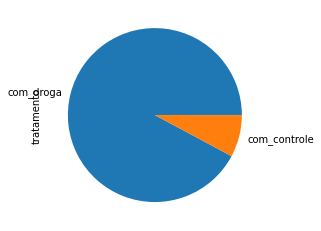

In [ ]:
dados['tratamento'].value_counts().plot.pie()

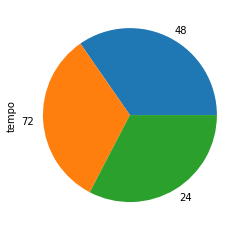

In [ ]:
dados['tempo'].value_counts().plot.pie()

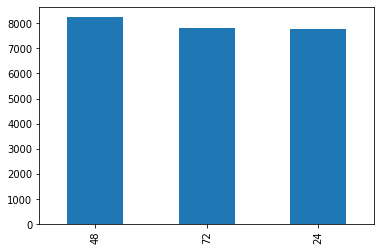

In [ ]:
dados['tempo'].value_counts().plot.bar()

In [ ]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6  id_001bd861f  com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7  id_0020d0484  com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260

[5 rows x 877 columns]

###Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?


A melhor explicação que eu achei é que essa 'composto' mais frequente é exatamente o composto controle. Além disso descobri que um estudo precisa de um grupo controle igual ou maior que seu grupo com droga. Como o grupo controle pode ser maior que o grupo com droga o que posso deduzir é que o grupo controle nesse estudo serve para qualquer droga. Portanto, ele é adequado. A pergunta que me sobra é por que o grupo controle não foi feito na mesma medida que o maior grupo com uma droga específica? Afinal, isso pouparia recursos.

###Desafio 02: Plotar as 5 últimas linhas da tabela

In [ ]:
dados.tail()

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[5 rows x 877 columns]

Para tentar resolver o primeiro desafio vou agrupar os dados pelo tratamento e tentar achar alguma relação com as outras colunas.

In [ ]:
dados.groupby('tratamento')['tempo'].value_counts()

tratamento    tempo
com_controle  48        648
              72        612
              24        606
com_droga     48       7602
              72       7180
              24       7166
Name: tempo, dtype: int64

In [ ]:
dados.groupby('tratamento')['dose'].value_counts()

tratamento    dose
com_controle  D1        951
              D2        915
com_droga     D1      11196
              D2      10752
Name: dose, dtype: int64

In [ ]:
dados.groupby('tratamento')['composto'].value_counts()

tratamento    composto 
com_controle  cacb2b860    1866
com_droga     87d714366     718
              9f80f3f77     246
              8b87a7a83     203
              5628cb3ee     202
                           ... 
              f5c443039       1
              fb69fd749       1
              fb8a93a83       1
              fe6105bde       1
              ffe357f8f       1
Name: composto, Length: 3289, dtype: int64

Achamos uma relação interessante. Somente a droga cacb2b860 tem grupo controle. Quantos individuos ela possui no grupo com a droga?

In [ ]:
dados[dados['composto'] == 'cacb2b860']['tratamento'].value_counts()

com_controle    1866
Name: tratamento, dtype: int64

In [ ]:
dados.query('(tratamento == "com_droga") & (composto == "cacb2b860")')

Empty DataFrame
Columns: [id, tratamento, tempo, dose, composto, g-0, g-1, g-2, g-3, g-4, g-5, g-6, g-7, g-8, g-9, g-10, g-11, g-12, g-13, g-14, g-15, g-16, g-17, g-18, g-19, g-20, g-21, g-22, g-23, g-24, g-25, g-26, g-27, g-28, g-29, g-30, g-31, g-32, g-33, g-34, g-35, g-36, g-37, g-38, g-39, g-40, g-41, g-42, g-43, g-44, g-45, g-46, g-47, g-48, g-49, g-50, g-51, g-52, g-53, g-54, g-55, g-56, g-57, g-58, g-59, g-60, g-61, g-62, g-63, g-64, g-65, g-66, g-67, g-68, g-69, g-70, g-71, g-72, g-73, g-74, g-75, g-76, g-77, g-78, g-79, g-80, g-81, g-82, g-83, g-84, g-85, g-86, g-87, g-88, g-89, g-90, g-91, g-92, g-93, g-94, ...]
Index: []

[0 rows x 877 columns]

Como a droga cacb2b860, só aparece como com_controle, esse deve ser o código do placebo. Sendo assim eu presumo que não é possível responder esse desafio com os dados da tabela. A hipotese que eu levanto é que o desenho dessa pesquisa preve somente um tamanho de grupo controle de 7,8% dos grupos com droga.

###Desafio 03: Proporção das classes tratamento.

In [ ]:
com_droga = dados['tratamento'].value_counts(normalize = True)[0] * 100
com_controle = dados['tratamento'].value_counts(normalize = True)[1] * 100


In [ ]:
print(f'Tratamente com droga: {com_droga.round(2)}% e tratamento com controle {com_controle.round(2)}%')

Tratamente com droga: 92.16% e tratamento com controle 7.84%


###Desafio 04: Quantas tipos de drogas foram investigados.

Considerando que a entrada cacb2b860 na coluna de droga é para indicar o placebo é melhor desconsidera-lo da soma.

In [ ]:
dados['composto'].unique().shape[0] - 1

3288

###Desafio 05: Procurar na documentação o método query(pandas). 

In [ ]:
dados.query('24 < tempo < 72 & tratamento == "com_controle"')

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
25     id_0054388ec  com_controle     48   D1  ...  0.8837  0.5534  0.8976  1.0050
47     id_008a986b7  com_controle     48   D2  ... -0.4979  0.5281 -0.9245 -0.9367
117    id_0144e88e8  com_controle     48   D2  ...  0.1478  0.8284  0.2281  1.6320
148    id_01b05de6c  com_controle     48   D1  ...  0.2406  0.5057  0.8017  1.0280
163    id_01cb69424  com_controle     48   D2  ... -0.1335  0.6712 -0.4978 -0.1923
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23539  id_fcf7fddb9  com_controle     48   D2  ... -1.2830  0.5137  0.0737  0.8924
23612  id_fdad8021f  com_controle     48   D1  ... -0.7488  0.7123  0.8293  1.2290
23656  id_fe33cc325  com_controle     48   D1  ...  0.6641  1.0380  0.1504  0.9803
23793  id_ffd26f361  com_controle     48   D2  ...  0.8813  0.7757 -0.5272  0.7082
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808

[648 rows x 877 columns]

###Desafio 06: Renomear as colunas tirando o hífen. 

In [ ]:
dados.columns = dados.columns.str.replace('-', '')

In [ ]:
dados.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

###Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)

In [ ]:
import matplotlib.pyplot as plt


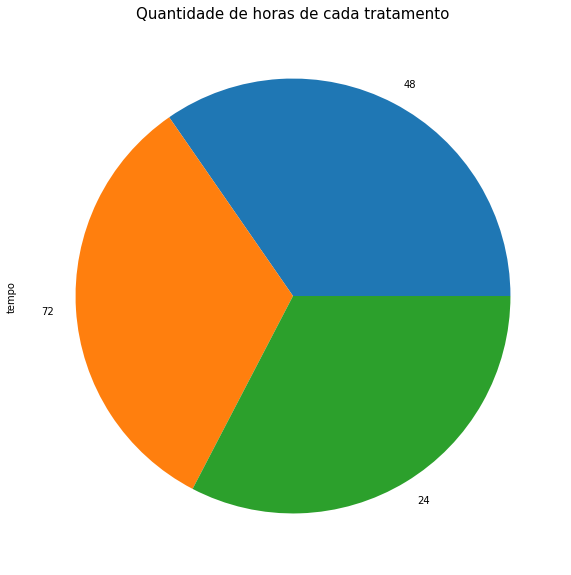

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Quantidade de horas de cada tratamento', fontsize=15)
dados['tempo'].value_counts().plot.pie()

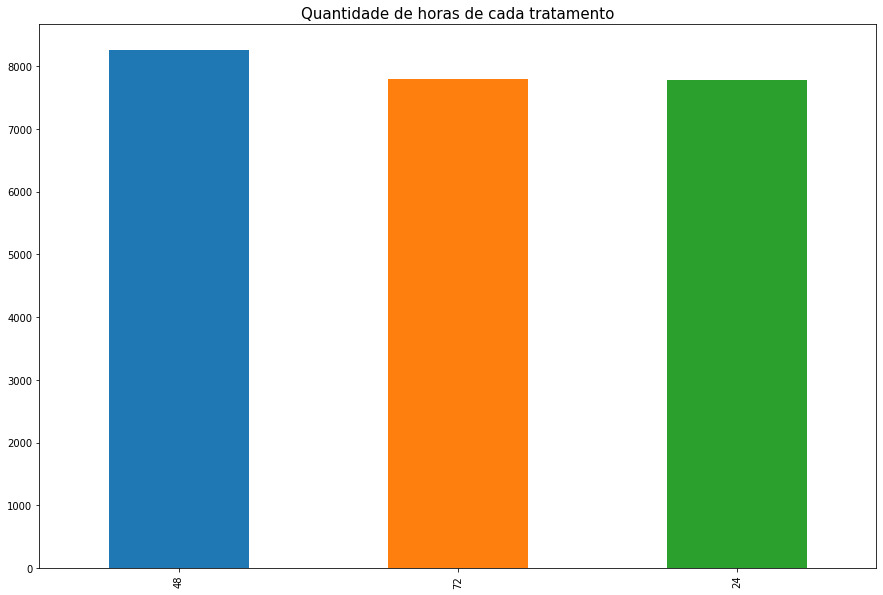

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Quantidade de horas de cada tratamento', fontsize=15)
dados['tempo'].value_counts().plot.bar(color=['tab:blue','tab:orange', 'tab:green'])

In [ ]:
import seaborn as sns


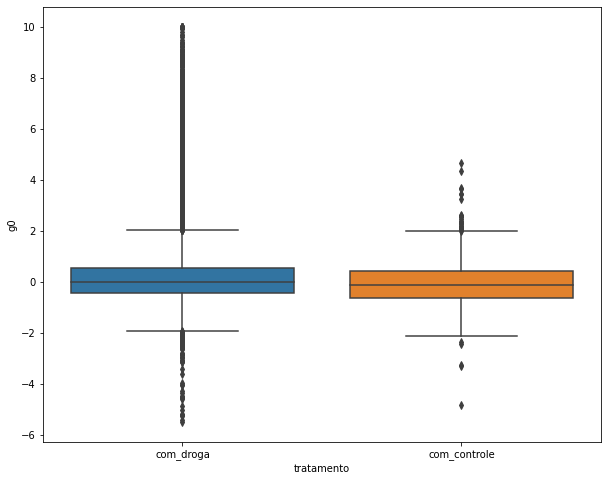

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x='tratamento' , data=dados)

###Desafio 08: Resumo do que você aprendeu com os dados

Aprendi a importar os dados direto da internet, mesmo que comprimidos.

Aprendi a verificar o tamanho da tabela.

Aprendi a vizualizar somente as primeiras linhas da tabela.

Aprendi a verificar quais e  quantos são os tipos de elementos existentes em cada coluna.

Aprendi a normalizar os dados uma contagem de elementos de uma coluna.

Aprendi a filtras os dados.

Aprendi a fazer gráficos de torta e barras a partir dos dados de uma coluna.

#Aula 02

Olá!

Seja bem vindo e bem vinda a aula 02!

Na aula 01, nós começamos a explorar um conjunto de dados relacionados à industria farmacêutica. Para isso nós utilizamos uma biblioteca muito conhecida no mundo de DataScience: o Pandas.

Nós utilizamos o Pandas para abrir o dataset, que estava no formato CSV, e para gerar um dataframe, uma tabela, para então começarmos a analisar e entender o que significava cada coluna. Com a ajuda da Vanessa, especialista na área, identificamos que temos colunas que nos remetem a dados que estão sob tratamento(droga) e com controle. Além disso, temos também diversas colunas que remetem aos genes.

Começamos nossa análise olhando para cada coluna de forma separada e também geramos gráficos, para auxiliar nossa análise.

E você? Como se saiu na resolução dos desafios?

Agora, vamos mergulhar juntos na aula 02!

In [ ]:
dados

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

A base de dados que usamos até o momento tem uma variável chamada ```composto```mas entendemos, com a ajuda da Vanessa, que essa não é a melhor nomenclatura para representa-la. 
Por isso, vamos usar a função ```map``` da biblioteca Pandas para renomear essa coluna.
É importante destacar que passamos o parâmetro ```inplace = True```, esse parâmetro faz com que os dados sejam modificados no local e o dataframe será atualizado. 
Caso esse parâmetro não seja declarado, o default é ```inplace = False``` e o retorno será uma cópia do objeto e caso você queira, precisa salva-lo com um outro nome.

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

Aqui, estamos usando a função ```head``` para apresentar as 5 primeiras linhas da base de dados e assim, podemos conferir se a renomeação aconteceu da maneira que estavámos esperando.

In [ ]:
dados.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

Queremos melhorar a visualização do nosso histograma de compostos e, como existem mais de 3.000 variações na nossa base de dados, decidimos elencar os 5 compostos que mais aparecem.
Para isso, vamos usar a função ```value_counts``` (função presente na biblioteca Pandas e que conta a ocorrência dos diferentes valores) e, como queremos saber somente os 5 elementos mais frequentes, também declaramos o ```index[0:5]```. Essa parte final, faz com que o ```value_counts```se atenha à contagem dos maiores valores e apresente como resultado apenas o index do  intervalo [0, 5[, ou seja, o nome dos 5 maiores valores. 

In [ ]:
cod_compostos = dados['composto'].value_counts().index[0:5]

Na célula acima, declaramos a variável ```cod_compostos``` e definimos a função que está atrelada à ela. 
E agora, executamos a nossa nova variável para verificar o resultado.

In [ ]:
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

Exitem algumas maneiras de filtrar uma base de dados e optamos em usar a função ```query``` do Pandas e, somente a título de curiosidade, essa função é bastante análoga ao SQL (linguagem de programação para bancos de dados).
A estrutura dela é bastante simplificada, precisamos apenas definir o dataframe, chamar a função e passar como parâmetro a condição que deve ser 
filtrada no nosso conjunto de dados.

Nesta parte do projeto, queremos realizar um filtro em nossos dados, selecionando apenas as linhas nas quais o composto esteja dentro da nossa lista ```cod_composto``` (lista que representa os 5 compostos mais testados no experimento) e vamos utilizar o método ```query``` para resolver este problema. 

Como parâmetro da função, passamos uma string contendo a lógica para realização da seleção dos dados. O que queremos é o seguinte: o ```query```precisa retornar para nós todas as linhas contendo os 5 compostos mais utilizados. Logo, a string necessária para isso é: ```composto in @cod_compostos```. 

Usamos ```composto``` porque essa é a coluna a ser verificada no dataframe e ```cod_compostos``` por ser a lista com os top 5 compostos, o detalhe aqui é que o ```@``` é necessário para informar o ```query``` que ```cod_composto``` é uma variável que já foi definida fora da função.

In [ ]:
dados.query('composto in @cod_compostos')

id    tratamento  tempo dose  ...     c96     c97     c98     c99
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
16     id_002fb9c19     com_droga     48   D1  ... -9.9840 -9.9840 -9.9840 -6.7840
25     id_0054388ec  com_controle     48   D1  ...  0.8837  0.5534  0.8976  1.0050
38     id_0079af0fb  com_controle     24   D1  ...  0.2187  0.0737  0.6498 -1.4820
40     id_007bfbb91  com_controle     24   D2  ... -0.5751  0.3362  0.8543  0.9180
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23793  id_ffd26f361  com_controle     48   D2  ...  0.8813  0.7757 -0.5272  0.7082
23802  id_fff3976bd     com_droga     24   D1  ... -8.4480 -4.4550 -5.7930 -3.7000
23805  id_fff6df1c5     com_droga     48   D2  ...  0.1516  0.4503 -0.6312 -0.8302
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[3235 rows x 877 columns]

Agora que vimos que a nossa filtragem funcionou e que temos como retorno uma base de dados com 3.235 linhas, podemos usar a função ```query```como parâmetro para o ```countplot```, o nosso gráfico de barras.
O ```countplot``` é um gráfico pré-programado da biblioteca ```Seaborn```e, por isso, precisaremos fazer a importação padrão da mesma (```import seaborn as sns```). Adicionalmente, aqui no Google Colaboratory, para que possamos enxergar o gráfico com os padrões de configuração da biblioteca, precisamos rodar ```sns.set()```.
Além disso, para refinar a apresentação do gráfico, podemos utilizar algumas funcionalidades da biblioteca ```Matplotlib``` (fazendo, primeiramente, sua importação - ```import matplotlib.pyplt as plt```).
Também estamos definindo o tamanho do gráfico através da função ```figure``` e seu parâmetro ```figsize=(x, y))``` e o título através do ```set_title('Título')```.
Como comentado na aula, usualmente, armazenamos o nosso gráfico em uma variável ```ax``` e então, definimos as demais configurações (por exemplo, ```ax.set_title('Título')```.
E, finalmente, para visualizar o gráfico de barras, usamos o ```plt.show()```.

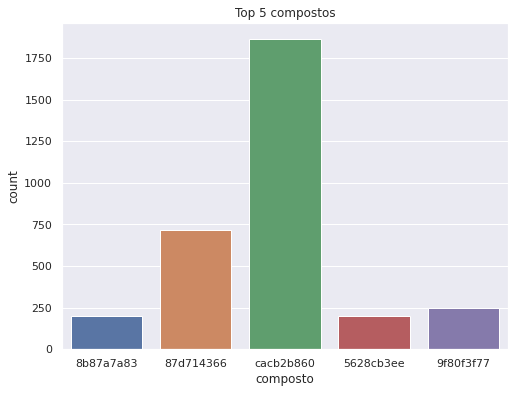

In [ ]:
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

Até o momento analisamos os dados de tempo, dose, compostos e afins. Entretanto, não analisamos os dados de expressões gênicas (G's) e viabilidade celular (C's). Será que podemos criar um gráfico de barras para esses dados?
Vamos pensar que a nossa base de dados apresenta mais de 3.000 compostos. Mas quantos desses compostos aparecem na coluna ```g-0```? 
Para responder essa questão, vamos usar a função ```unique()``` do Pandas que conta os valores únicos presentes na coluna em questão. Como resposta padrão, o retorno será uma lista com arrays (os nomes dos compostos) mas, nosso objetivo é saber o tamanho dessa lista e, por isso, usamos o ```len```, pois assim, ele contará o tamanho desta lista de arrays.

In [ ]:
len(dados['g0'].unique())

14367

Como temos diversos compostos únicos dentro da coluna ```g-0```, não é viável que façamos o mesmo gráfico utilizado anteriormente. 
Por isso, precisamos traçar uma nova estratégia para visualizar os nossos dadose aqui, usaremos um histograma.
O primeiro passo, é identificar qual o valor mínimo (```min()```) e o valor máximo (```max()```) para entender qual o intervalo númerico com o qual estamos trabalhando.

In [ ]:
dados['g0'].min()

-5.513

In [ ]:
dados['g0'].max()

10.0

Depois que reconhecemos que o nosso intervalo vai de ~5,5 a 10,0, podemos partir para o histograma e a função que usaremos para plotar é do Pandas (```dataframe['variável'].hist()```).
Assim que rodamos essa função, percebemos que a visualização destes dados ainda não está boa pois, a divisão padrão das barras do histograma, representam intervalos muito grandes que atrapalham o entendimento dos dados.
Por isso, acresentamos um parâmetro dentro da função ```(bins = número de quebras)``` para melhor dividir e, consequentemente visualizar os dados.
Quando definimos os bins em 100, podemos perceber que a forma se aproxima bastante de uma curva bastante conhecida: a curva normal.

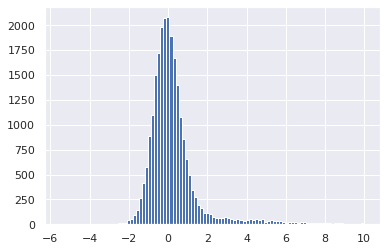

In [ ]:
dados['g0'].hist(bins = 100)

Aqui, estamos testando o mesmo histograma para outro gene, o ```g-19```. E queremos fazer uma comparação entre os gráficos e podemos fazer algumas considerações sobre ambos os gráficos.
Percebemos, por exemplo, que a imagem seguem a mesma tendência de curva mas há um deslocamento para a direita.

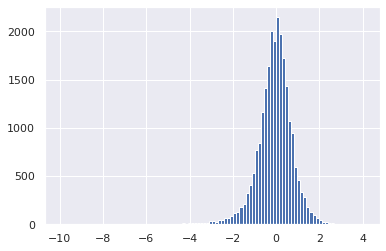

In [ ]:
dados['g19'].hist(bins = 100)

Como concluimos que plotar os gráficos de todos os genes é inviável, vamos analisar resumidamente algumas estatísticas sobre eles. 
Para isso, vamos usar a função ```describe``` do Pandas que já calcula e descreve algumas estatísticas importantes para o entendimento dos dados (contagem, média, desvio padrão, mínimo, alguns quartis e máximo).


In [ ]:
dados.describe()

tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]

Neste ponto, vamos separar as variáveis que queremos analisar da base de dados (exemplo: ```g-0``` e ```g-1```) através de uma lista de arrays.
Entretanto, apesar desta ser uma ótima estratégia para a separação, temos 771 genes e escrevê-los um a um seria muito trabalhoso e podemos fazer de uma outra forma.

In [ ]:
dados[['g0', 'g1']]

g0      g1
0      1.0620  0.5577
1      0.0743  0.4087
2      0.6280  0.5817
3     -0.5138 -0.2491
4     -0.3254 -0.4009
...       ...     ...
23809  0.1394 -0.0636
23810 -1.3260  0.3478
23811  0.3942  0.3756
23812  0.6660  0.2324
23813 -0.8598  1.0240

[23814 rows x 2 columns]

Uma estratégia mais direta em que não precisaremos escrever a lista gene a gene, é o uso da função ```loc[]``` do Pandas.
Como argumentos, passamos primeiramente o ```:```, os dois pontos faz com que o ```loc[]```retorne todos os elementos de uma determinada coluna, isso é importante quando não sabemos qual a quantidade de linhas de um dataframe. E, o segundo elemento, passamos as colunas que são de nosso interesse. No caso, queremos que a função nos retorne todos os elementos das colunas ```g-0```até ```g-771```.
E, por fim, podemos declarar a nossa função de interesse a partir deste filtro realizado nos dados, o ```describe()```.

In [ ]:
dados.loc[:,'g0':'g771'].describe()

g0            g1  ...          g770          g771
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean       0.248366     -0.095684  ...     -0.219210      0.101524
std        1.393399      0.812363  ...      1.326193      1.417674
min       -5.513000     -5.737000  ...    -10.000000    -10.000000
25%       -0.473075     -0.562200  ...     -0.554400     -0.523800
50%       -0.008850     -0.046600  ...      0.028700     -0.006500
75%        0.525700      0.403075  ...      0.496400      0.536950
max       10.000000      5.039000  ...     10.000000     10.000000

[8 rows x 772 columns]

Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas.
Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o ```describe()``` que fizemos a partir do ```loc[]``` e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).
Para isso, vamos usar o ```.T[]``` no código anterior que produzimos para organizar o ```describe()```.
Ou seja, vamos manter todo o código até o ```describe()``` e, ao final, acrescentaremos o ```.T[]```. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do ```.T[]``` a estatística alvo (```.T['estatística']```) e, por último, acrescentamos o ```.hist(bins = número de quebras)``` para que o histograma seja observado.



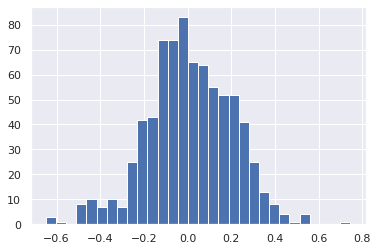

In [ ]:
dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=30)

A seguir, reproduzimos o código acima apenas alterando o parâmetro estatístico a ser analisado (mínimo e máximo, por exemplo). 
E assim, podemos perceber as nuances de cada métrica.

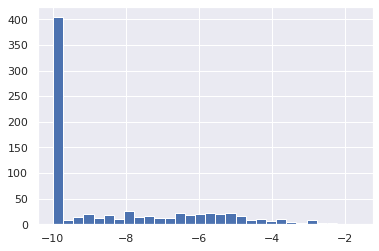

In [ ]:
dados.loc[:,'g0':'g771'].describe().T['min'].hist(bins=30)

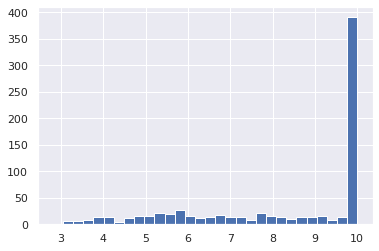

In [ ]:
dados.loc[:,'g0':'g771'].describe().T['max'].hist(bins=30)

É muito interessante que a gente replique a análise desenvolvida para os ```genes (g)```, nos ```tipos celulares (c)```. 
Por isso, vamos copiar a linha de código que produz os histogramas mas aqui, vamos modificar o argumento ```loc[:,'g-0':'g-771'] -> loc[:,'c-0':'c-99']``` e a quantidade de bins ```hist(bins=100) -> hist(bins=50)```.

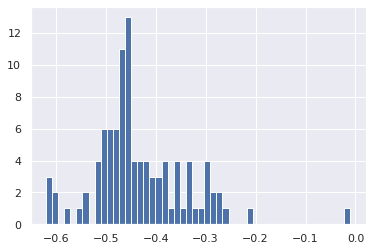

In [ ]:
dados.loc[:,'c0':'c99'].describe().T['mean'].hist(bins=50)

Um outro tipo de gráfico super interessante e útil é o boxplot. 
Para visualizá-lo, vamos usar a função ```boxplot```do Seaborn e, como argumentos dessa função vamos passar um ```x```, onde ```x = coluna que será plotada neste eixo``` e a base de dados ```data = conjunto de dados```.
O boxplot apresenta uma caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) e terceiro quartil (75%)) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal).
O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.

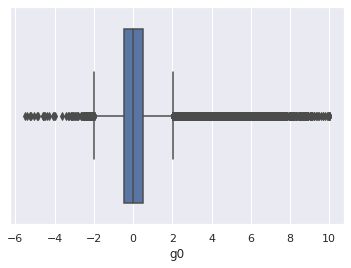

In [ ]:
sns.boxplot(x='g0' , data=dados)

Podemos também, além de definir apenas os dados que irão no eixo x, definimos os dados para o outro eixo, atribuindo um valor para o parâmetro ```y``` (```y = variável que vai ser plotada neste eixo```).
Como podemos perceber, no boxplot que representa o ```tratamento = com_droga``` apresenta muitos outliers e isso gera uma discussão bastante interessante pois, do ponto de vista biológico a investigação desses pontos é importante mas, dependendo da área que estamos trabalhando, esse ponto pode apresentar outras soluções. 
Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados mas também saber acerca do negócio que estamos tratando.

###Desafio 01: Ordenar o gráfico countplot

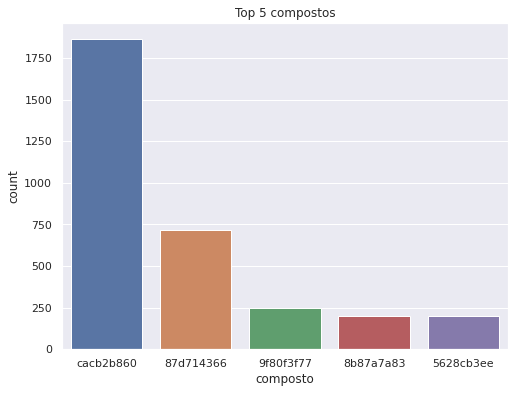

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

Como a lista cod_compostos foi elaborada a partir da ordenação dos compostos que aparecem mais, ela própria já está ordenada do maior para o menor.

###Desafio 02: Melhorar a visualização alterando tamanho da fonte...

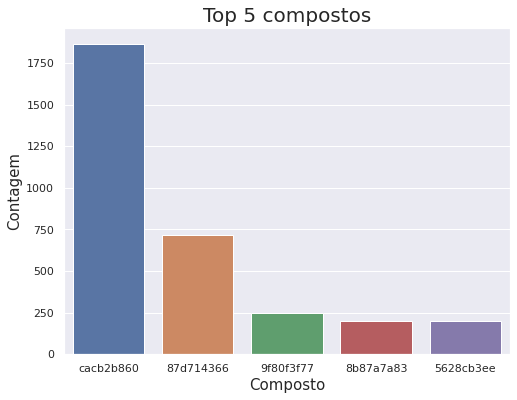

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 compostos', fontsize=20)
plt.xlabel('Composto', fontsize=15)
plt.ylabel('Contagem', fontsize=15)
plt.show()

###Desafio 03: Plotar os histogramas com seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


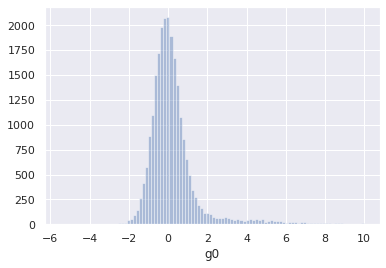

In [ ]:
sns.distplot(dados['g0'], bins=100, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


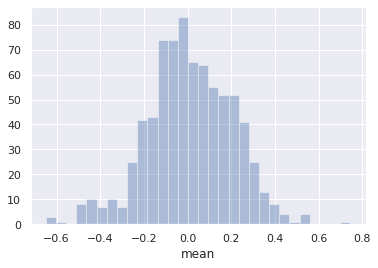

In [ ]:
sns.distplot(dados.loc[:,'g0':'g771'].describe().T['mean'], bins=30, kde=False) 

###Desafio 04: Estudar sobre as estatíticas retornadas no .describe()

In [ ]:
dados.describe()

tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]

As funções apresentadas pelo .describe() significam:
*   count: Quanto nºs existem nesse conjunto.
*   mean: A média dos valores.
*   std: Desvio padrão, é o valor da dispersão dos dados, ou seja, quanto um valor aleatório tende a se desviar da média. Quanto menor, mais próximo o valor será da média.
*   minimo: O menor valor encontrado.
*   25%: O primeiro quartil, o nº que divide o primeiro quarto dos nºs do restante.
*   50%: A mediana, o nº que divide o total de nºs ao meio.
*   75%: O terceiro quartil, o nº que divide o ultimo quarto dos nºs do restante.
*   max: O maior valor encontrado.









###Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

Gráficos de tamanho inadequado, seja pequeno ou grande demais, podem induzir a erros de interpretação.

###Desafio 06: Fazer outras análises com o boxplot e até com o histograma.

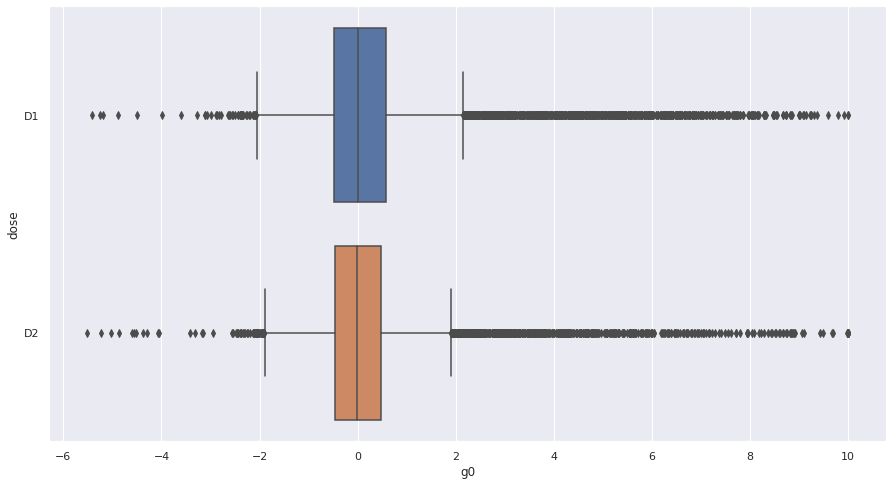

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='g0', y='dose', data=dados)
plt.show()

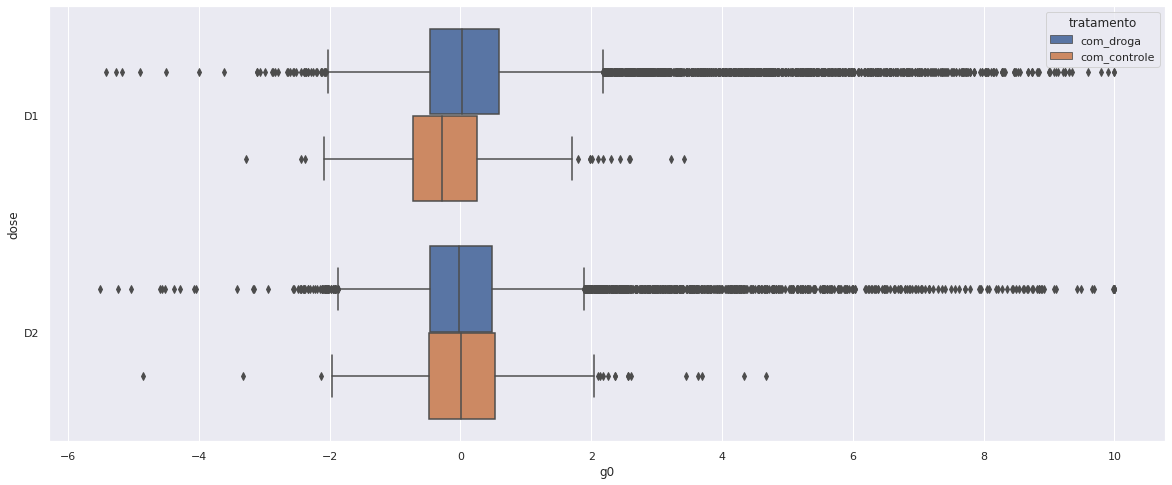

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='g0', y='dose', hue='tratamento', data=dados)
plt.show()

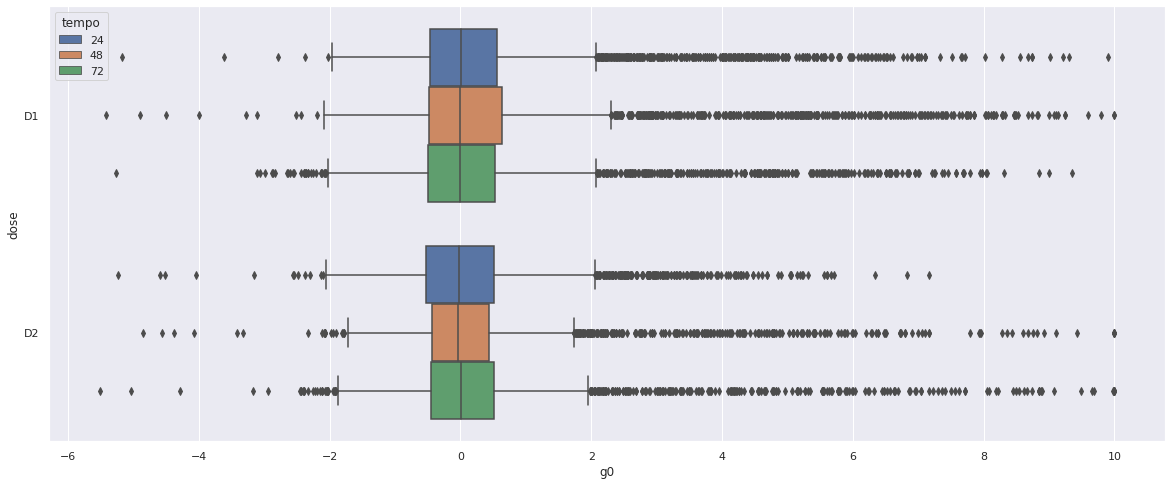

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='g0', y='dose', hue='tempo', data=dados)
plt.show()

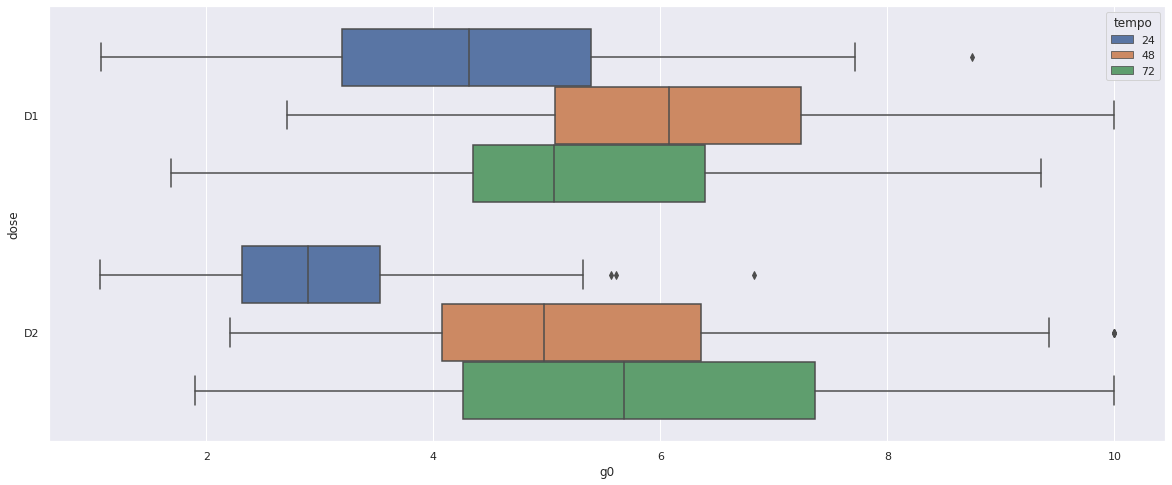

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='g0', y='dose', hue='tempo', data=dados[dados['composto'] == '87d714366'])
plt.show()

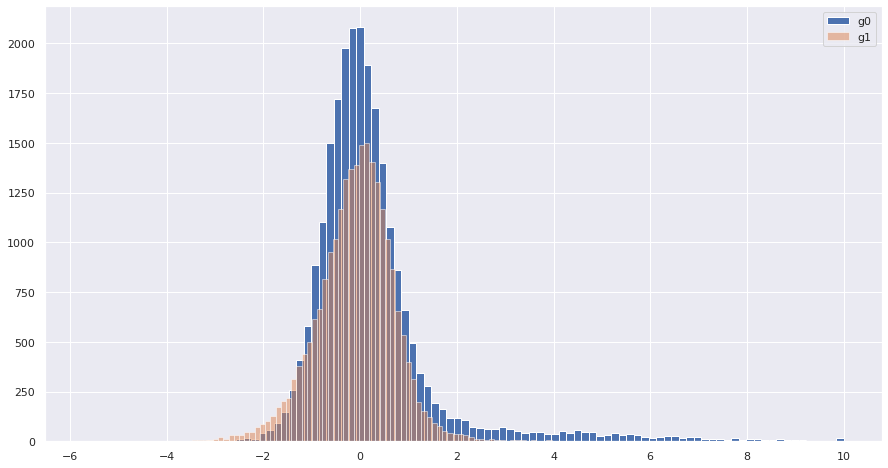

In [ ]:
plt.figure(figsize=(15,8))
dados['g0'].hist(bins = 100, label='g0')
dados['g1'].hist(bins = 100, label='g1', alpha=0.5)
plt.legend()
plt.show()

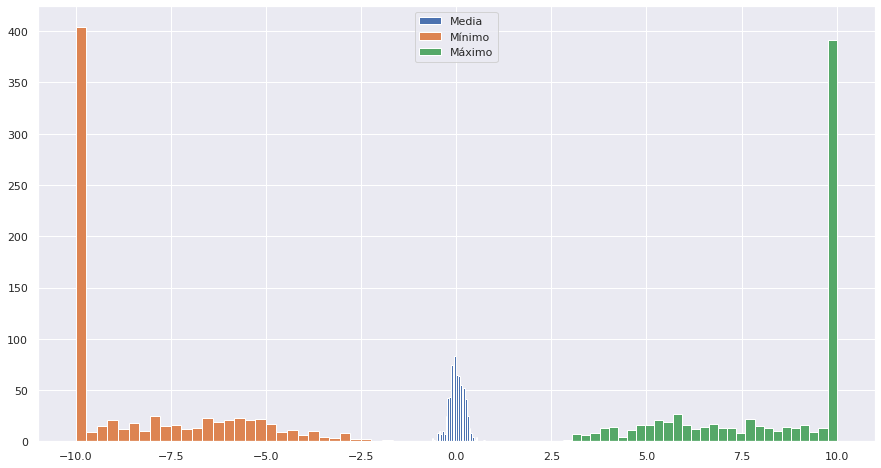

In [ ]:
plt.figure(figsize=(15,8))
dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=30, label='Media')
dados.loc[:,'g0':'g771'].describe().T['min'].hist(bins=30, label='Mínimo')
dados.loc[:,'g0':'g771'].describe().T['max'].hist(bins=30, label='Máximo')
plt.legend()
plt.show()

###Desafio 07: Resumo do que você aprendeu com os dados

Nessa aula aprendi:

Ordenar um gráfico no countplot.

Contar elementos únicos em uma coluna.

Fazer gráfico histograma no matplotlib.

Verificar estatisticas de contagem, média, mínimo, máximo, desvio padrão e quartis de uma tabela ou de uma coluna com o .describe.

Fazer seleção de linhas e colunas com o .loc.

Transpor uma tabela, invertendo linhas e colunas com o .T.

Criar gráfico boxplot com o seaborn.

Fazer melhorias em gráficos:

	Aumentar o tamanho,
	Dar um título,
	Mudar o nome e o tamanho da fonte dos eixos x e y.

Fazer gráfico histograma no seaborn.

O que significa o formato do boxplot.



#Aula 03

Olá Cientista! 

Seja bem vindo e bem vinda à aula 03!

Na aula anterior, pudemos entender a importância da construção de gráficos na visualização dos dados. 
Discutimos principalmente os histogramas e boxplots e, além disso, também falamos sobre a função ```describe``` do Pandas. 

Você conseguiu fazer todos os desafios? Então vamos mergulhar juntos na aula 03!

Hoje, nosso foco é nos aprofundar ainda mais na base de dados e entender mais sobre a relação entre as nossas variáveis.

Olhando para o nosso conjunto de dados, percebemos que temos dados de tratamento, tempo, dosagem, composto químico usado e os dados genéticos.
E os primeiros dados que vamos relacionar são aqueles ligados ao tratamento e, como já vimos anteriormente, estes são dados categóricos.

Um dos vieses de análise está relacionado às proporções destas categorias e, como aprendemos na aula anterior, um gráfico de frequências pode ser muito útil nesse aspecto.

In [ ]:
dados.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

Conforme nossa busca na [documentação do Pandas](https://pandas.pydata.org), encontramos uma maneira para construir uma tabela de frequências, a função ```crosstab```. Esta função recebe como argumentos os dados que gostaríamos de correlacionar de uma maneira bem simples: ```crosstab(dataframe['coluna1'], dataframe['coluna2'])``` e então, como retorno, temos uma matriz que relaciona essas variáveis a partir da frequência.

Podemos ver que as categorias da variável ```dose``` transformaram-se em linhas e as categorias da variável ```tempo``` são colunas.

In [ ]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo    24    48    72
dose                   
D1     3886  4354  3907
D2     3886  3896  3885

Entretanto, na matriz acima não estamos considerando o tratamento usado, apesar desta variável ser de suma importância, visto que, decide se há ou não presença de um composto no evento.
Por isso, vamos construir uma nova tabela com o ```crosstab``` considerando essa nova variável.

Para isso, usaremos a mesma sintaxe anterior, adicionando ```dados['tratamento']```ao final e, adicionalmente, deixamos as duas primeiras colunas declaradas entre colchetes, pois assim garantimos que suas informações estarão distribuídas nas linhas, ou seja, o código final para este comando será: ```crosstab(dataframe[['coluna1'], dataframe['coluna2']], dataframe['coluna3'])```.

O resultado será uma tabela de frequências multi-index (mais de um índice) sendo que o index da esquerda se refere aos dados da variável ```dose``` e o index da direita são as informações de ```tempo```, respeitando a ordem na qual declaramos as respectivas variáveis.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Apesar de já termos construído uma tabela bem interessante através da frequência de algumas variáveis, podemos explorar a proporção destes dados entre si. 

Para fazer isso vamos, novamente, copiar o nosso comando acrescentando um novo parâmetro ao final, o ```normalize```. Então o código ficará: ```crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')```. Esse parâmetro normaliza a nossa tabela e escolhemos que ela faça isso a partir do índice, ou seja, ela fará a comparação entre as categorias, isto é, a soma de cada linha será igual a 1.
Fazer este tipo de análise possibilita que façamos algumas suposições acerca do balanceamento entre as categorias e, analisando a nossa matriz, podemos concluir que há proporcionalidade na nossa base de dados.


In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Podemos também agregar à nossa matriz uma métrica estatística associada a uma coluna. 
Para que isso seja cumprido, adicionamos mais dois parâmetros à nossa função ```crosstab```: o primeiro é o ```values = dataframe['variavel']``` e o segundo é o ```aggfunc``` que recebe como parâmetro alguma métrica estatística, como a média. Logo, ```aggfunc = 'mean'```. Isso quer dizer que queremos comparar entre as diferentes categorias (```com_controle``` e ```com_droga```) a média de valores associados a variável ```g-0```.

Aqui, podemos perceber algumas diferenças entre essas médias e podemos traçar algumas hipóteses a serem verificadas. Lembrando que a média de uma variável, é uma conta feita a partir dos valores que aquela amostra apresenta e não é o valor que ela assume, de fato. Por isso, não podemos concluir nada somente olhando a média, mas entender seu comportamento nos dá indícios por quais caminhos podemos seguir.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Para variáveis contínuas, fazer tabelas de frequências não é a melhor estratégia para analisá-las. 
Mas, construir um novo tipo de gráfico pode ser muito interessante para o nosso processo. 

Então, para fins de visualização, o primeiro passo é filtrar a nossa base de dados com as colunas que queremos investigar.
No nosso caso, vamos analisar a relação entre as colunas ```g-0``` e ```g-3``` e, por isso, definimos uma lista de arrays com os nomes dessas colunas (```dataframe[['coluna1', 'coluna2']]```) e, como retorno, teremos nosso conjunto somente com as variáveis alvo.

In [ ]:
dados[['g0', 'g3']]

g0      g3
0      1.0620 -0.6208
1      0.0743  0.0604
2      0.6280 -0.0764
3     -0.5138  0.5288
4     -0.3254  0.6919
...       ...     ...
23809  0.1394 -0.5080
23810 -1.3260  0.9905
23811  0.3942 -0.7389
23812  0.6660  0.2044
23813 -0.8598  0.7952

[23814 rows x 2 columns]

O ```scatterplot``` é um tipo de gráfico pré programado da biblioteca Seaborn e recebe como parâmetros a variável que vai ser usada no eixo x, a variável do eixo y e, por fim, o conjunto de dados. 

O código ficará: 

```sns.scatterplot(x = 'variavel para o eixo x', y = 'variavel para o eixo y', data = base de dados)```

E, como queremos investigar as variáveis ```g-0``` e ```g-3```, atribuímos cada uma delas a um eixo. 

O gráfico de dispersão utiliza os dados como uma coleção de pontos cartesianos e ele é usado para apurar se há relação de causa e efeito entre duas variáveis quantitativas. 

No nosso caso, cada linha será um par ordenado de acordo com o que declaramos no código, ou seja, o valor de ```g-0``` será a cordenada x e o valor de ```g-3``` será a coordenada y. 

Por exemplo: para a linha 0 da base de dados teremos (1,0620 , -0,6208) 

Mas, por outro lado, a partir do gráfico de dispersão, não podemos dizer que uma variável afeta a outra, podemos apenas definir se há relação entre elas e qual a intensidade disso.

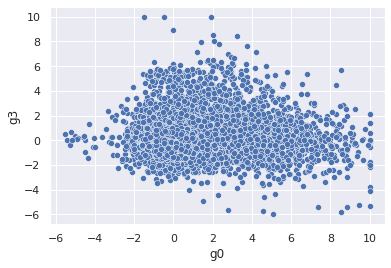

In [ ]:
sns.scatterplot(x='g0', y = 'g3', data=dados)

Observando o gráfico que construímos acima, não parecemos encontrar nenhum padrão tão definido. Então, vamos confrontar mais duas colunas para verificar se encontramos algum padrão melhor definido.

Aqui, vamos usar a variável ```g-0``` para o eixo x e a variável ```g-8``` para o eixo y para construir o nosso novo gráfico.

Como retorno, recebemos um gráfico de dispersão onde a nuvem de pontos cartesianos parece desenhar melhor um padrão: conforme o ```g-0``` aumenta, o valor de ```g-8``` diminui. Aparentemente, a relação entre essas duas variáveis desenha uma curva com inclinação negativa.

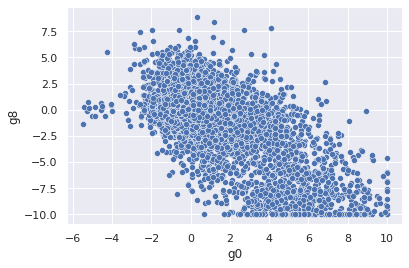

In [ ]:
sns.scatterplot(x='g0', y = 'g8', data=dados)

E, como parte do nosso trabalho é levantar hipóteses e confirmá-las (ou não), precisamos verificar se a nossa suspeita de que a relação entre as variáveis ```g-0``` e ```g-8```desenha uma curva com inclinação negativa. 

Para isso, vamos utilizar uma outra função do Seaborn, a ```lmplot```. A ```lmplot``` vai desenhar no nosso gráfico de dispersão uma linha de tendência e, assim, poderemos confirmar o padrão daquele conjunto de dados.

Os parâmetros a serem recebidos, são muito parecidos com aqueles usados no ```scatterplot```. Então teremos 

```sns.lmplot(data=base de dados, x='variavel para o eixo x', y='variavel para o eixo y', line_kws={'color': 'cor da linha de tendencia'})```

Utilizamos o parâmetro ```line_kws = {'color': 'red'}``` para criar um bom contraste entre os pontos do gráfico de dispersão e a linha de tendência.

Observando o nosso gráfico, podemos concluir a nossa hipótese inicial, mas ele ainda não é suficiente para finalizarmos a nossa análise.



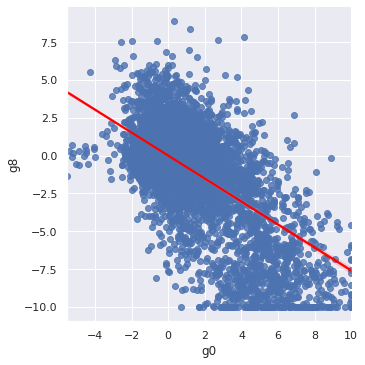

In [ ]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color': 'red'})

Para uma análise mais real e completa, é interessante que separemos ainda mais o nosso conjunto de dados. Isso porque, na imagem acima, apesar de termos uma linha de tendência para a relação entre os dados ```g-0``` e ```g-8```, não há filtros para a dosagem, o tratamento e o tempo. E, pesando em drug discorevy, é extremamente importante que façamos a separação desses conjuntos.

Então, vamos acrescentar mais alguns parâmetros para executar a separação. Acrescentamos o parâmetro ```col = tramento``` para que sejam plotados gráficos de acordo com as categorias da variável em questão nas colunas (```com_droga``` e ```com_controle```) e também incluímos o parâmetro ```row = 'tempo'``` para que mais uma subdivisão seja feita e, as linhas apresentem novos gráficos com as diferentes categorias (```24```,```48``` e ```72```).

Assim, podemos perceber as nuances de cada gráfico e o comportamento de determinado subconjunto.

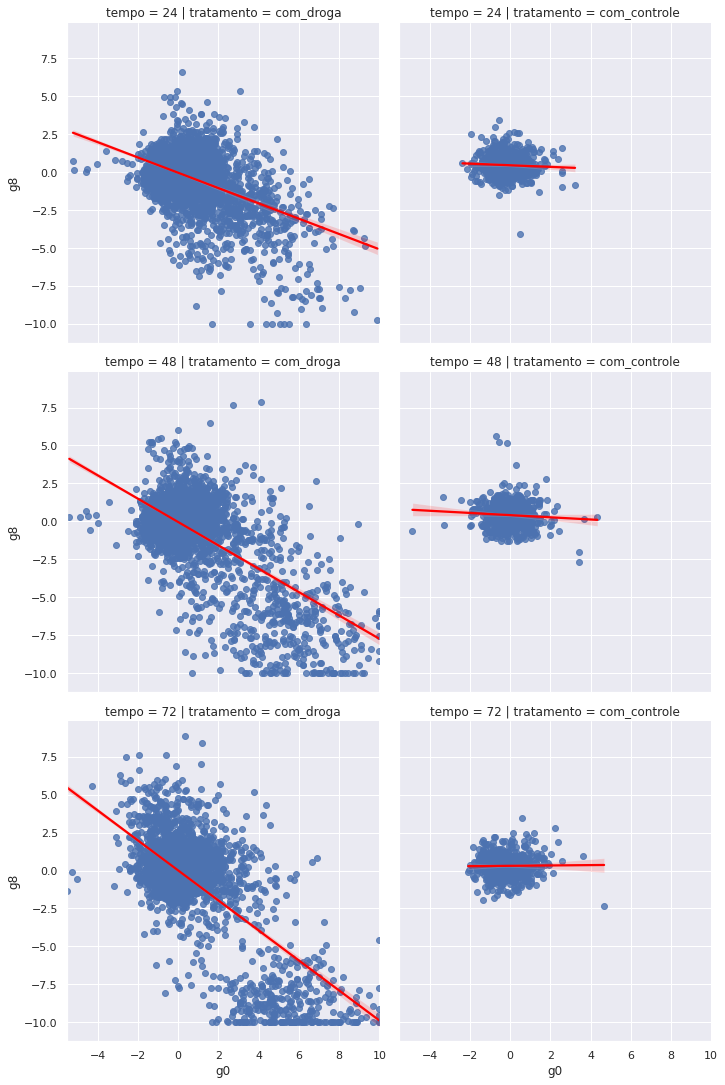

In [ ]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

Outra medida para analisar como as variáveis estão associadas é a correlação. 

Para isso, vamos usar uma função já conhecida do Pandas, o ```loc``` e, vamos agregar o ```.corr```. O ```loc``` serve para definirmos o intervalo em que a correlação vai ser calculada. Aqui, estamos calculando a correlação entre todos os genes. 

Como retorno, temos uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1.
Por exemplo, o primeiro valor numérico apresentado na primeira linha é o resultado da correlação entre a variável que está nesta linha e nesta coluna, no nosso caso, o ```g-0``` em ambas as extremidades. No primeiro valor numérico apresentado na segunda linha, temos a correlação entre ```g-1``` e ```g-0``` e assim por diante. 

Mas, como interpretar esses valores? Bom, temos a seguinte divisão:
    
    - Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
    - Valores muito próximos de 0: variáveis pouco ou não correlacionadas

E, o que diferencia se essa correlação será proporcional ou inversamente proporcional, será o sinal. Quer dizer:

    - Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
    - Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

Agora que já sabemos como analisar essa tabela, podemos voltar para o nosso gráfico de dispersão construído com ```g-0``` e ```g-8`` e perceber que a nossa tabela confirma que ambas as variáveis estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado na tabela é de -0,604212.

In [ ]:
dados.loc[:,'g0':'g771'].corr()

g0        g1        g2  ...      g769      g770      g771
g0    1.000000  0.086032  0.176188  ... -0.127375 -0.514201  0.405908
g1    0.086032  1.000000 -0.054518  ... -0.006866 -0.095108 -0.032233
g2    0.176188 -0.054518  1.000000  ...  0.014489 -0.078661  0.103985
g3    0.011266 -0.027855  0.042633  ... -0.206077 -0.002142  0.058219
g4    0.403153  0.193647  0.013968  ... -0.172727 -0.363673  0.250713
...        ...       ...       ...  ...       ...       ...       ...
g767 -0.052622 -0.003378 -0.053149  ...  0.065450  0.008603 -0.001136
g768  0.300241 -0.030756  0.115415  ...  0.079364 -0.382607  0.351651
g769 -0.127375 -0.006866  0.014489  ...  1.000000  0.135853 -0.083713
g770 -0.514201 -0.095108 -0.078661  ...  0.135853  1.000000 -0.425063
g771  0.405908 -0.032233  0.103985  ... -0.083713 -0.425063  1.000000

[772 rows x 772 columns]

Analisar essa grande tabela é um desafio bem grande. Então, como auxílio visual costumamos plotar um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

E, como esse código já está construído na própria documentação do Seaborn, vamos copiar o [código](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) de lá, fazendo apenas algumas pequenas alterações.

Então, de ```corr = d.corr()``` mudamos para ```corr = dados.loc[:,'g-0':'g-50'].corr()``` pois ajustamos o ```d``` para a nossa base de dados (```dados```) e decidimos incluir um ```loc``` para fazer o mapa de calor apenas do ```g-0``` ao ```g-50```. 
Também retiramos o parâmetro ```vmax=.3``` da última parte do código pois este era um limitador da correlação que não nos interessa no momento.

Adicionalmente, também fizemos a importação da biblioteca Numpy que é usada para gerar este mapa de calor (```import numpy as np```).





In [ ]:
corr = dados.loc[:,'g0':'g50'].corr()

O mapa de calor mostra uma escala de cores em sua lateral direita, a legenda e, para cada pontinho, podemos perceber a força da correlação sendo mostrada através de uma cor associada.

Olhando para o nosso gráfico, percebemos que, em sua maioria, as expressões genicas não apresentam correlações tão altas entre si (podemos deduzir isso observando que o gráfico em grande parte é translúcido).

É importante destacar que não podemos inferir causalidade a partir da correlação, como já descrevemos anteriormente no gráfico de dispersão. 
Exemplificando: vimos que ```g-0``` e ```g-8``` têm correlação inversamente proporcional entre si mas não podemos concluir que é o ```g-0``` que faz o ```g-8``` diminuir, ou seja, a causa.



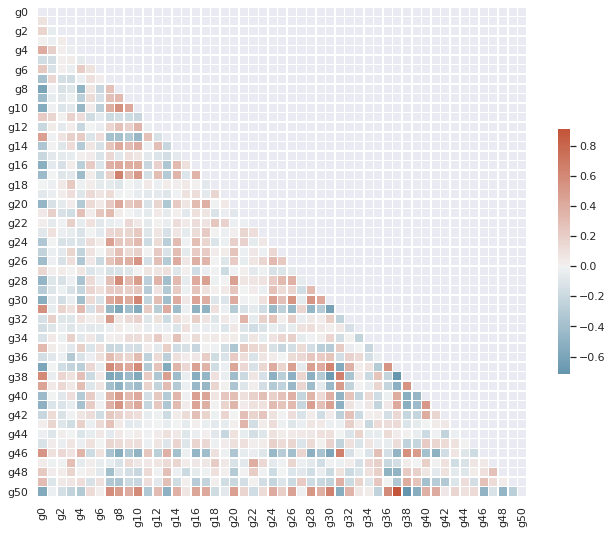

In [ ]:
import numpy as np


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Agora, vamos repetir o processo de construção do mapa de calor para a a viabilidade celular (```c```).

Definimos uma nova variável ```corr_celular``` e ajustamos os parâmetros de acordo com os nossos ```cs```.

Observando o gráfico de saída, podemos perceber uma grande diferença entre os dois mapas de calor que construímos. A escala deste novo gráfico é bem diferente da escala anterior, temos valores apenas entre 0,65 e 0,90, correlações altamente proporcionais.

In [ ]:
corr_celular = dados.loc[:,'c0':'c50'].corr()

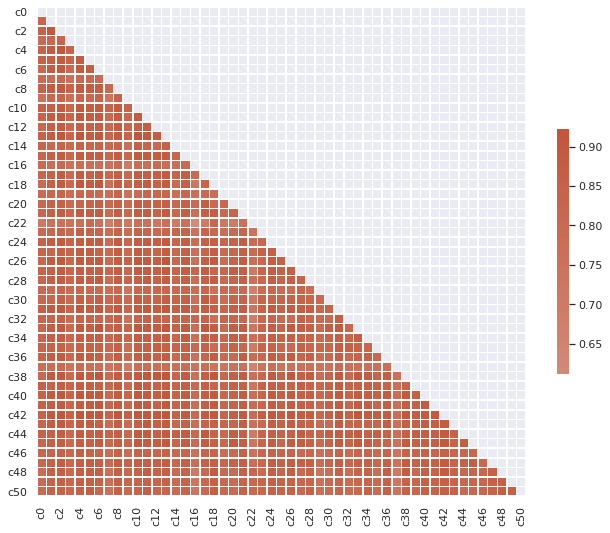

In [ ]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [ ]:
dados.groupby('dose')['tempo'].value_counts().unstack()

tempo    24    48    72
dose                   
D1     3886  4354  3907
D2     3886  3896  3885

In [ ]:
dados.pivot_table(index='dose', columns='tempo', aggfunc='count')['g0']

tempo    24    48    72
dose                   
D1     3886  4354  3907
D2     3886  3896  3885

In [ ]:
dados.groupby(by=['dose','tempo'])['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
dados.pivot_table(index=['dose','tempo'], columns='tratamento', aggfunc='count')['g0']

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
dados.groupby(by=['dose','tempo'])['tratamento'].value_counts(normalize=True).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
dados.groupby(by=['dose','tempo', 'tratamento'])['g0'].mean().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
dados.pivot_table(index=['dose','tempo'], columns='tratamento')['g0']

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

###Desafio 02: Normalizar o crosstab pela coluna.


In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

###Desafio 03: Explorar outros agregadores.

In [ ]:
dados.groupby(by=['dose','tempo', 'tratamento'])['g0'].describe().unstack().T

dose                         D1               ...           D2             
tempo                        24           48  ...           48           72
      tratamento                              ...                          
count com_controle   301.000000   343.000000  ...   305.000000   305.000000
      com_droga     3585.000000  4011.000000  ...  3591.000000  3580.000000
mean  com_controle    -0.251760    -0.122773  ...     0.013174     0.070250
      com_droga        0.367996     0.412469  ...     0.214480     0.253439
std   com_controle     0.751395     0.853396  ...     0.836845     0.878041
      com_droga        1.461954     1.693903  ...     1.315476     1.451532
min   com_controle    -2.370000    -3.276000  ...    -4.859000    -1.909000
      com_droga       -5.183000    -5.420000  ...    -4.567000    -5.513000
25%   com_controle    -0.752800    -0.627000  ...    -0.471200    -0.440300
      com_droga       -0.436800    -0.475700  ...    -0.428200    -0.452550
50%   com_controle    -0.291200    -0.214500  ...    -0.050600     0.052800
      com_droga        0.027000     0.016200  ...    -0.029600     0.000150
75%   com_controle     0.186000     0.381600  ...     0.425900     0.584200
      com_droga        0.588600     0.648600  ...     0.433600     0.500250
max   com_controle     3.226000     3.423000  ...     4.335000     4.670000
      com_droga        9.908000    10.000000  ...    10.000000    10.000000

[16 rows x 6 columns]

###Desafio 04: Explorar o melt.

In [ ]:
dados.melt(id_vars=['dose', 'tratamento', 'tempo'], value_vars='g0')

dose    tratamento  tempo variable   value
0       D1     com_droga     24       g0  1.0620
1       D1     com_droga     72       g0  0.0743
2       D1     com_droga     48       g0  0.6280
3       D1     com_droga     48       g0 -0.5138
4       D2     com_droga     72       g0 -0.3254
...    ...           ...    ...      ...     ...
23809   D2     com_droga     24       g0  0.1394
23810   D2     com_droga     24       g0 -1.3260
23811   D2  com_controle     48       g0  0.3942
23812   D1     com_droga     24       g0  0.6660
23813   D1     com_droga     72       g0 -0.8598

[23814 rows x 5 columns]

###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.


In [ ]:
g = dados.query('tratamento == "com_droga"').loc[:,'g0':'g50']
c = dados.query('tratamento == "com_droga"').loc[:,'c0':'c50']
concatenados = pd.concat([g,c], axis=1)
concatenados

g0      g1      g2      g3  ...     c47     c48     c49     c50
0      1.0620  0.5577 -0.2479 -0.6208  ...  1.3070 -1.0230  0.7709  0.7180
1      0.0743  0.4087  0.2991  0.0604  ...  0.6065  0.6259  0.4716  0.0453
2      0.6280  0.5817  1.5540 -0.0764  ...  0.1787  0.3354  0.1349 -0.3569
3     -0.5138 -0.2491 -0.2656  0.5288  ... -1.3390 -3.0160 -3.0040 -2.8880
4     -0.3254 -0.4009  0.9700  0.6919  ... -0.2353 -0.1285 -0.1740  0.3559
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
23808  0.1608 -1.0500  0.2551 -0.2239  ...  0.3631 -0.0474 -0.6761  0.6650
23809  0.1394 -0.0636 -0.1112 -0.5080  ... -0.6097  0.7577  0.0365  0.1181
23810 -1.3260  0.3478 -0.3743  0.9905  ... -0.7309  0.2137 -0.1295 -0.1987
23812  0.6660  0.2324  0.4392  0.2044  ...  0.5460 -0.7703 -0.1128  0.9409
23813 -0.8598  1.0240 -0.1361  0.7952  ... -0.7138 -1.6730 -1.4890 -6.0290

[21948 rows x 102 columns]

In [ ]:
correlacao_gg_cc = concatenados.corr()
correlacao_gg_cc

g0        g1        g2  ...       c48       c49       c50
g0   1.000000  0.071546  0.176710  ... -0.603942 -0.617839 -0.604046
g1   0.071546  1.000000 -0.050010  ...  0.003686  0.035052  0.024609
g2   0.176710 -0.050010  1.000000  ... -0.163114 -0.171502 -0.157127
g3   0.023815 -0.011016  0.040901  ... -0.062495 -0.036906 -0.014167
g4   0.410954  0.164478  0.025538  ... -0.360632 -0.362597 -0.373212
..        ...       ...       ...  ...       ...       ...       ...
c46 -0.610167 -0.007487 -0.170008  ...  0.823017  0.820953  0.828521
c47 -0.660685  0.009141 -0.177350  ...  0.853127  0.854897  0.849757
c48 -0.603942  0.003686 -0.163114  ...  1.000000  0.856524  0.868251
c49 -0.617839  0.035052 -0.171502  ...  0.856524  1.000000  0.862033
c50 -0.604046  0.024609 -0.157127  ...  0.868251  0.862033  1.000000

[102 rows x 102 columns]

In [ ]:
correlacao_g_c = correlacao_gg_cc.loc[:'g50','c0':]
correlacao_g_c

c0        c1        c2  ...       c48       c49       c50
g0  -0.631908 -0.633972 -0.647684  ... -0.603942 -0.617839 -0.604046
g1  -0.031841 -0.023024 -0.031111  ...  0.003686  0.035052  0.024609
g2  -0.171517 -0.184193 -0.181112  ... -0.163114 -0.171502 -0.157127
g3  -0.040447 -0.098196 -0.091010  ... -0.062495 -0.036906 -0.014167
g4  -0.418163 -0.390767 -0.404131  ... -0.360632 -0.362597 -0.373212
g5   0.215371  0.205295  0.217897  ...  0.200061  0.200240  0.202212
g6  -0.118444 -0.095505 -0.095426  ... -0.065790 -0.100598 -0.092782
g7   0.506307  0.576042  0.587199  ...  0.583276  0.553049  0.537385
g8   0.626995  0.607203  0.602322  ...  0.518789  0.567538  0.553873
g9   0.446771  0.487008  0.500464  ...  0.475770  0.470225  0.462208
g10  0.601936  0.660332  0.658062  ...  0.615925  0.614529  0.608326
g11 -0.232648 -0.270412 -0.276044  ... -0.253459 -0.228671 -0.225355
g12  0.355190  0.370312  0.367588  ...  0.349519  0.356004  0.363467
g13 -0.466533 -0.496344 -0.504182  ... -0.457406 -0.432397 -0.431559
g14  0.478462  0.487861  0.494613  ...  0.488837  0.502311  0.514220
g15  0.045237  0.064477  0.079157  ...  0.052492  0.040428  0.002766
g16  0.579815  0.577033  0.599163  ...  0.548464  0.563273  0.556802
g17  0.522815  0.519288  0.522216  ...  0.462463  0.491548  0.487044
g18 -0.030417 -0.069694 -0.056341  ... -0.079252 -0.065832 -0.053882
g19  0.085308  0.036996  0.047235  ...  0.010263  0.027540  0.029200
g20  0.449958  0.375287  0.413506  ...  0.385281  0.375486  0.393026
g21  0.119866  0.160524  0.140381  ...  0.147206  0.153736  0.146450
g22  0.096883  0.090411  0.075329  ...  0.025772  0.044621  0.046886
g23  0.160226  0.174672  0.168653  ...  0.171633  0.179223  0.194273
g24  0.469238  0.492006  0.512810  ...  0.515299  0.491905  0.494170
g25  0.336543  0.295822  0.308209  ...  0.277960  0.299887  0.293403
g26  0.507531  0.519855  0.560970  ...  0.544062  0.542355  0.536915
g27 -0.179987 -0.157073 -0.168326  ... -0.154443 -0.166994 -0.178458
g28  0.567359  0.588804  0.589458  ...  0.510524  0.507271  0.511021
g29  0.376573  0.393881  0.401231  ...  0.416576  0.376072  0.411223
g30  0.666818  0.712444  0.731951  ...  0.712492  0.690207  0.689686
g31 -0.706239 -0.708761 -0.722608  ... -0.688586 -0.703070 -0.692343
g32  0.220673  0.289522  0.299120  ...  0.351923  0.339775  0.319897
g33 -0.095103 -0.046722 -0.052279  ... -0.080709 -0.109310 -0.111254
g34  0.270164  0.221826  0.246096  ...  0.262855  0.280389  0.298412
g35 -0.281262 -0.210264 -0.254036  ... -0.270565 -0.266341 -0.264282
g36  0.147235  0.285071  0.267909  ...  0.290312  0.217756  0.218814
g37  0.628926  0.710012  0.723729  ...  0.711117  0.689742  0.668456
g38 -0.762883 -0.799770 -0.825206  ... -0.808164 -0.807921 -0.799457
g39 -0.541089 -0.549335 -0.573669  ... -0.537590 -0.543838 -0.536606
g40  0.594457  0.552035  0.570852  ...  0.520922  0.542397  0.567504
g41  0.665422  0.600730  0.624210  ...  0.511940  0.546698  0.531751
g42  0.244615  0.199898  0.212051  ...  0.171923  0.217359  0.202209
g43  0.009135  0.048579  0.036253  ...  0.046380  0.028429  0.040310
g44 -0.015408 -0.008973 -0.005739  ...  0.017693 -0.010703  0.000076
g45  0.219089  0.197796  0.212401  ...  0.226921  0.224257  0.240381
g46 -0.642335 -0.620548 -0.641454  ... -0.603833 -0.598670 -0.602499
g47  0.052363  0.036769  0.040492  ...  0.058054  0.062523  0.083411
g48 -0.108113 -0.191877 -0.205239  ... -0.202615 -0.170353 -0.131940
g49 -0.417391 -0.350077 -0.373018  ... -0.364263 -0.397046 -0.396781
g50  0.612990  0.705780  0.717616  ...  0.717649  0.686032  0.670281

[51 rows x 51 columns]

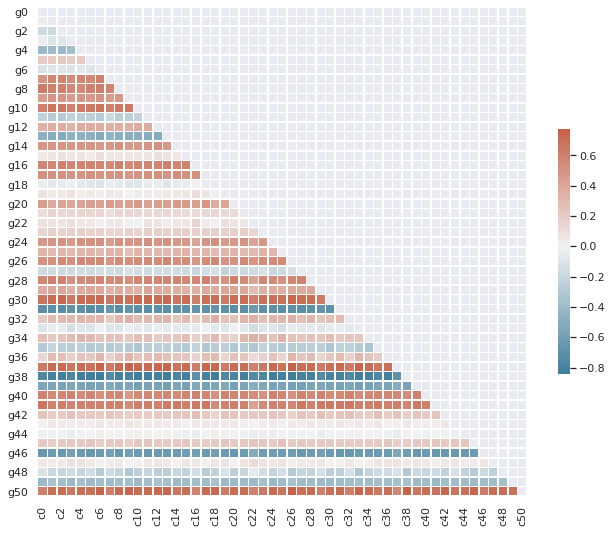

In [ ]:
import numpy as np


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacao_g_c, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacao_g_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

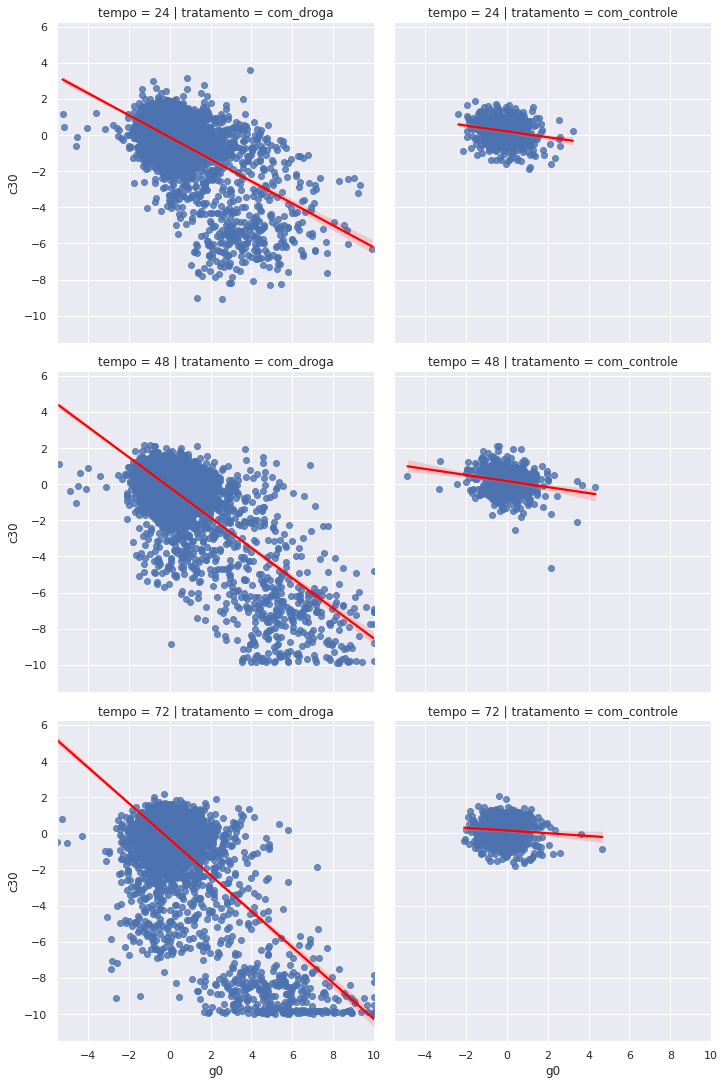

In [ ]:
sns.lmplot(data=dados, x='g0', y='c30', line_kws={'color': 'red'}, col='tratamento', row='tempo')
plt.show()

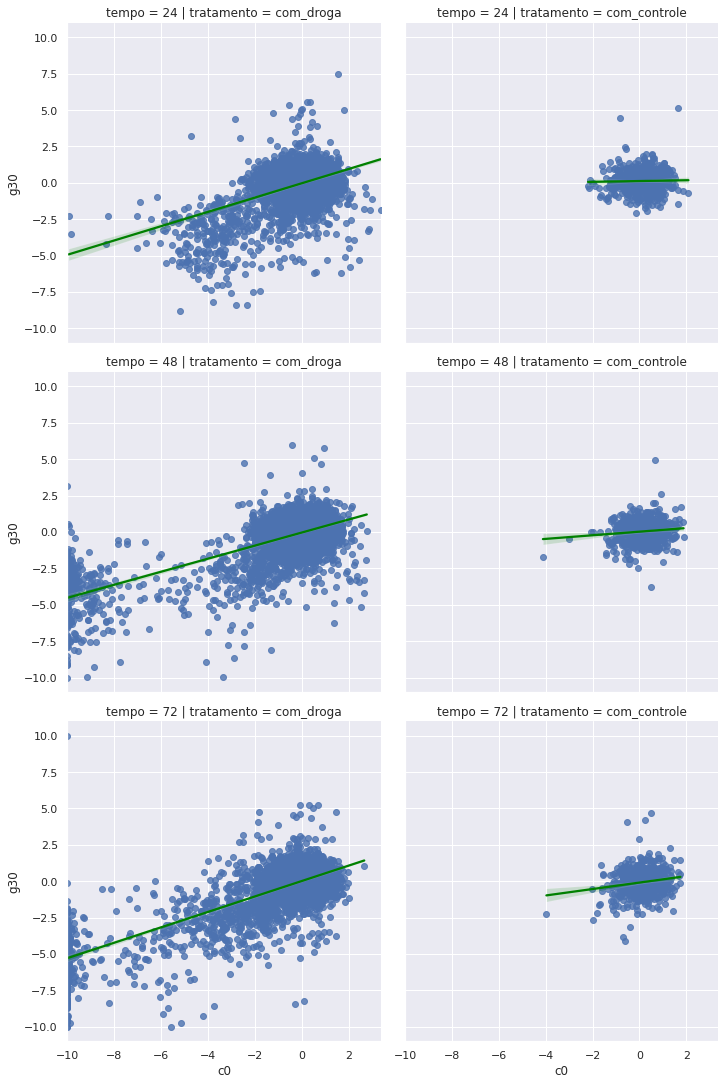

In [ ]:
sns.lmplot(data=dados, x='c0', y='g30', line_kws={'color': 'green'}, col='tratamento', row='tempo')
plt.show()

Das correlações entre expressões dos genes e viabilidde celular, podemos ver que de forma geral as expressões dos genes tem efeitos homogêneos nas viabilidades celulares. Quanto um determinado gene se expressa praticamente todas as viabilidade celulares se comportam iguais, sejam aumentando ou diminuindo.

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

O comando np.ones_like cria um array do mesmo tamanho que o dataframe para servir de base, o np.triu divide esse array quadrilatero em dois triangulos, um só com valores False, o outro só com valores True. Isso basicamente é uma mascara para depois plotar o gráfico nesse formato.
O comando sns.diverging_palette cria uma paleta com duas corres bem diferentes com seu degrade indo de uma, ficando clara e depois indo para a outra.
O comando sns.heatmap, cria o gráfico de calor usando o formato dado pela mascara e as cores dadas pelo paleta de duas corres.

###Desafio 07: Resumo do que você aprendeu com os dados

Aprendi a usar o crosstab para comparar colunas.
Aprendi a usar o gráfico scatterplot para verificar correlações.
Aprendi a usar o .cross para procurrar correlações entre várias colunas.
Aprendi a usar o gráfico de mapa de calor para verificar correlações entre várias colunas. 

#Aula 4

Olá cientista!

Seja bem vindo e bem vinda à aula 04!

Na aula passada, exploramos a relação e a correlação entre nossas variáveis. 
Estudamos a função ```crosstab```, gráfico de dispersão, linha de tendência, correlação entre variáveis e mapa de calor. Puxa, foi muita coisa!

Você conseguiur resolver os desafios que o Guilherme, o Thiago e a Vanessa deixaram pra vocês? Esperamos que sim porque hoje, vamos mergulhar na nossa penúltima aula!

A primeira coisa que vamos fazer para essa aula é abrir a nossa outra base de dados. Para baixá-la vamos acessar o github para copiarmos o link do arquivo. No repositório nós temos dois arquivos: os dados_experimentos.zip e o dados_arquivos.csv. Nós vamos agora trabalhar com os dados_arquivos.csv.

Vamos clicar com o botão esquerdo; assim que ele abrir, vamos clicar na opção "View raw" com o botão direito, e selecionar a opção "copiar endereço do link".

Vamos importar o pandas(caso você não tenha importado ainda) para nos ajudar a ler essa base de dados, através do seguinte código:

In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

id  ...  wnt_inhibitor
0  id_000644bb2  ...              0
1  id_000779bfc  ...              0
2  id_000a6266a  ...              0
3  id_0015fd391  ...              0
4  id_001626bd3  ...              0

[5 rows x 207 columns]

Repare que ele já mostra pra gente o número de colunas: 877. Ou seja, é um dataset bem extenso.

Vamos começar a analisar as colunas. A primeria coluna tem o nome de "id", o que nos remete a um identificador. Além disso, as seguintes colunas possuem nomes bem complexos. Não são nomes muito descritivos para quem não é da área.

Com a ajuda da Vanessa, descobrimos que esses nomes remetem aos mecanismos de ação das drogas. Ou seja, esses dados nos trazem a relação do mecanismo de ação do alvo (enzima, proteína, etc) com a droga utilizada. Ela também explicou sobre os termos "agonista" e "antiagonista", que ativam o receptor e o bloqueiam, respectivamente.

Nesse ponto a Vanessa nos explica numa apresentação como funciona a ligação do spike com o receptor e todo o procedimento de infecção nas nossas células.

Agora já sabemos que cada coluna do nosso dataframe representa um mecanismo de ação. Olhando para nosso cabeçalho percebemos que temos praticamente todos os dados com o valor 0. Será que todos os dados da tabela tem esse valor? Vamos investigar!

In [ ]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

Olha só! Nosso resultado foi um array entre 0 e 1. Se você quiser fazer um teste com todos os outros mecanismos de ação também encontrará o resultado entre 0 e 1. Mas por que isso acontece?

Cada linha é o resultado do experimento da outra base de dados dos experimentos que trabalhamos. Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0.

Portanto, todo resultado que obtivermos o número 1, saberemos que ele foi ativado.

Vamos fazer uma investigação agora que pode ser muito interessante para o cientista que está trabalhando nesse projeto: qual foi o mecanismo de ação que foi mais ativado?

Vamos então fazer a soma das colunas, para saber qual vai ser o que apresenta mais o número 1. Mas antes vamos verificar se todas as minhas colunas possuem somente números ou se possuem strings também nelas, através desse código:

In [ ]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Vimos que uma delas apresenta como resultado 1 objeto. Ou seja, não conseguiremos aplicar a função soma de forma direta.

Vamos então fazer essa soma excluindo a coluna id, que possui dados diferentes de números em sua composição, da seguinte maneira:

In [ ]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Legal. No resultado há uma informação que nos chama a atenção: os inibidores, no topo do nosso resultado, são os que possuem maior quantidade de resultados positivos. Seria um ponto a se investigar.

Então aqui vamos ter o nosso primeiro desafio da aula 4. Lembrando que todos os desafios estão no final desse notebook da aula.



Nós fizemos uma contagem para saber onde o mecanismo de ação obteve mais respostas; agora vamos fazer outros testes.

Vamos verificar se a linha específica que vamos escolher foi ativada em algum momento. E, se ela foi ativada, quantas vezes isso ocorreu?

Utilizaremos o seguinte código:

In [ ]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

E aqui temos o nosso resultado. Na primeira linha tivemos uma única ativação. Já na segunda não obtivemos nenhuma. Na terceira tivemos 3, e assim por diante. Nesse que tivemos a resposta como 0, precisaríamos saber se foi um controle, ou se realmente a droga não ativou nenhuma resposta.

Aqui embaixo temos os nossos dados dos resultados:


In [ ]:
dados_resultados.head()

id  ...  wnt_inhibitor
0  id_000644bb2  ...              0
1  id_000779bfc  ...              0
2  id_000a6266a  ...              0
3  id_0015fd391  ...              0
4  id_001626bd3  ...              0

[5 rows x 207 columns]

E aqui temos a nossa base de dados:

In [ ]:
dados.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

Na base de dados resultados não temos a informação que queremos, referente ao tratamento. Nós só temos a coluna tratamento na base de dados inteira.

No tratamento só temos a coluna id, e os mecanismos de ação que foram ativados por aquela coluna. Então, agora, precisamos de alguma maneira, mesclar essas informações.

Antes de fazer esse passo, de mesclar, vamos criar duas novas colunas na base de dados resultado. Vamos criar uma primeira coluna que vamos chamar de n_moa(número de moas ativos), que é justamente o que havíamos calculado anteriormente, dessa maneira:

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

 Vamos então verificar se a coluna apresenta resultados diferentes de 0; se for diferente de 0 ela retorna a mensagem 'true'; se for igual a 0 retorna 'false':

In [ ]:
dados_resultados['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

Ok, então o código para criarmos e visualizarmos as duas colunas é esse:

In [ ]:
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0
dados_resultados.head()

id  5-alpha_reductase_inhibitor  ...  n_moa  ativo_moa
0  id_000644bb2                            0  ...      1       True
1  id_000779bfc                            0  ...      0      False
2  id_000a6266a                            0  ...      3       True
3  id_0015fd391                            0  ...      0      False
4  id_001626bd3                            0  ...      1       True

[5 rows x 209 columns]

Para visualizarmos basta ir até as duas últimas colunas que elas estarão lá.

Agora que temos as duas colunas que queremos, vamos mesclar, ou então "mergear", as informações que queremos.

Para isso vamos utilizar o merge do pandas, através desse código:

In [ ]:
 dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

id tratamento  tempo dose  ...     c98     c99  n_moa  ativo_moa
0  id_000644bb2  com_droga     24   D1  ...  0.3801  0.4176      1       True
1  id_000779bfc  com_droga     72   D1  ...  0.6077  0.7371      0      False
2  id_000a6266a  com_droga     48   D1  ... -1.4080  0.6931      3       True
3  id_0015fd391  com_droga     48   D1  ... -0.3876 -0.8154      0      False
4  id_001626bd3  com_droga     72   D2  ... -0.3786  0.7125      1       True

[5 rows x 879 columns]

Maravilha! Conseguimos agora a junção dos nossos dados de resultados com os dados de experimentos. Agora conseguimos responder a pergunta que fizemos anteriormente. No tratamento eu ativei algum moa?

Para fazer isso vamos utilizar o método:

In [ ]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

E obtivemos todas as respostas com o 'false'. Isso quer dizer que com controle não tivemos nenhuma resposta de algum mecanismo de ação.

Agora, será que algum tratamento que o paciente recebeu (com_droga, nesse caso) teve alguma substância que não ativou o mecanismo de ação? Vamos responder isso com a seguinte alteração no código anterior:

In [ ]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

Olha só, tivemos um resultado interessante. Vemos que 14447 tiveram mecanismos de ação, e aproximadamente 7500 não foram ativados. 

Vamos fazer uma análise utilizando agora o boxplot, que gera uma imagem onde podemos identificar a mediana(linha central) e os quartis, entendendo assim como está a distribuição dos dados; dessa maneira vamos identificar, de forma visual, a comparação de categoria dos dados. Para isso vamos utilizar os seguintes códigos:

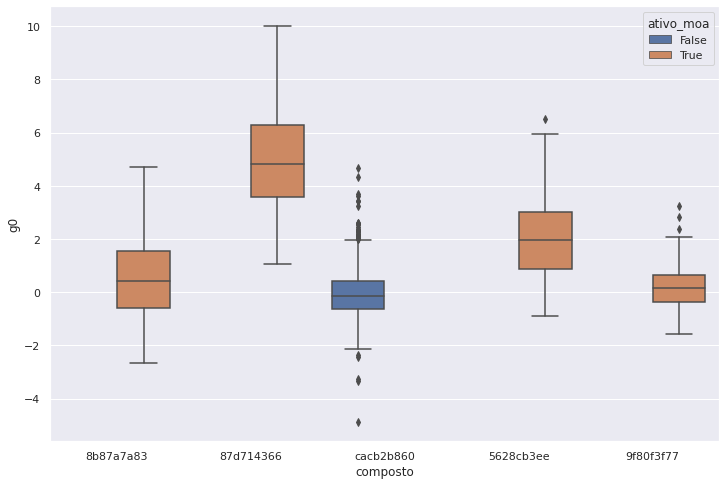

In [ ]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g0', x='composto', hue='ativo_moa')


Analisando os boxplots, percebemos que temos algumas categorias com a mediana próxima de 0; temos outra com a mediana próxima de 5 e a outra próxima de 2.

É curioso observarmos também que o 3º boxplot, da esquerda para a direita, está bem concentrado; esse composto específico é na verdade o composto que nos indica que foi "com tratamento".

Outro ponto interessante é que o último boxplot tem um comportamento muito semelhante ao 3º; provavelmente a droga não modificou tanto assim o gene 0.

Agora é com você! Faça os desafios e nos encontramos na próxima aula.

###Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

Primeiramente vamos separar os tipos de moa.

In [ ]:
tipos_moa = pd.Series()
for i in contagem_moa.index:
  _ = pd.Series(i.split('_')[-1])
  tipos_moa = tipos_moa.append(_, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
tipos_moa

0       inhibitor
1       inhibitor
2       inhibitor
3      antagonist
4      antagonist
          ...    
201     inhibitor
202     inhibitor
203      diuretic
204     inhibitor
205    antagonist
Length: 206, dtype: object

Alguns são estranho. Vamos comparar com a lista original.

In [ ]:
contagem_moa.index[[52, 79, 83, 133, 136, 137]]

Index(['anesthetic_-_local', 'radiopaque_medium', 'chelating_agent',
       'insulin_secretagogue', 'nitric_oxide_donor', 'vitamin_b'],
      dtype='object')

Me parece que esse devem ser renomeados para os nome originais.

In [ ]:
tipos_moa.replace({'local': 'anesthetic_-_local' , 'medium': 'radiopaque_medium', 'agent': 'chelating_agent',
       'secretagogue': 'insulin_secretagogue', 'donor': 'nitric_oxide_donor', 'b': 'vitamin_b'}, inplace=True)

In [ ]:
contagem_moa_tipo= pd.DataFrame(data={'composto': contagem_moa.index, 'tipo': tipos_moa.values, 'valores': contagem_moa.values})

In [ ]:
contagem_moa_tipo

composto        tipo  valores
0                                nfkb_inhibitor   inhibitor      832
1                          proteasome_inhibitor   inhibitor      726
2                      cyclooxygenase_inhibitor   inhibitor      435
3                  dopamine_receptor_antagonist  antagonist      424
4                 serotonin_receptor_antagonist  antagonist      404
..                                          ...         ...      ...
201               protein_phosphatase_inhibitor   inhibitor        6
202                         autotaxin_inhibitor   inhibitor        6
203                                    diuretic    diuretic        6
204                             erbb2_inhibitor   inhibitor        1
205  atp-sensitive_potassium_channel_antagonist  antagonist        1

[206 rows x 3 columns]

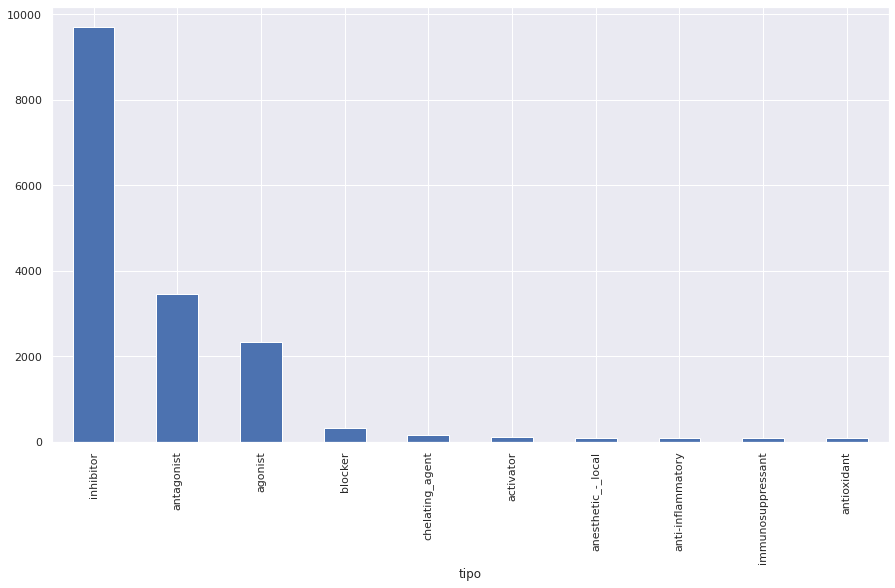

In [ ]:
plt.figure(figsize=(15,8))
contagem_moa_tipo.groupby('tipo')['valores'].sum().sort_values(ascending=False)[:10].plot.bar()

###Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

In [ ]:
eh_controle  = (dados['tratamento'] == 'com_controle')

In [ ]:
dados_combinados['eh_controle'] = eh_controle.astype('int')

In [ ]:
dados_combinados

id    tratamento  tempo  ... n_moa ativo_moa  eh_controle
0      id_000644bb2     com_droga     24  ...     1      True            0
1      id_000779bfc     com_droga     72  ...     0     False            0
2      id_000a6266a     com_droga     48  ...     3      True            0
3      id_0015fd391     com_droga     48  ...     0     False            0
4      id_001626bd3     com_droga     72  ...     1      True            0
...             ...           ...    ...  ...   ...       ...          ...
23809  id_fffb1ceed     com_droga     24  ...     1      True            0
23810  id_fffb70c0c     com_droga     24  ...     1      True            0
23811  id_fffc1c3f4  com_controle     48  ...     0     False            1
23812  id_fffcb9e7c     com_droga     24  ...     1      True            0
23813  id_ffffdd77b     com_droga     72  ...     0     False            0

[23814 rows x 880 columns]

###Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

In [ ]:
tempo_24 = (dados['tempo'] == 24)
dados_combinados['24h'] = tempo_24.astype('int')
tempo_48 = (dados['tempo'] == 48)
dados_combinados['48h'] = tempo_48.astype('int')
tempo_72 = (dados['tempo'] == 72)
dados_combinados['72h'] = tempo_72.astype('int')

In [ ]:
dados_combinados

id    tratamento  tempo dose  ... eh_controle  24h  48h  72h
0      id_000644bb2     com_droga     24   D1  ...           0    1    0    0
1      id_000779bfc     com_droga     72   D1  ...           0    0    0    1
2      id_000a6266a     com_droga     48   D1  ...           0    0    1    0
3      id_0015fd391     com_droga     48   D1  ...           0    0    1    0
4      id_001626bd3     com_droga     72   D2  ...           0    0    0    1
...             ...           ...    ...  ...  ...         ...  ...  ...  ...
23809  id_fffb1ceed     com_droga     24   D2  ...           0    1    0    0
23810  id_fffb70c0c     com_droga     24   D2  ...           0    1    0    0
23811  id_fffc1c3f4  com_controle     48   D2  ...           1    0    1    0
23812  id_fffcb9e7c     com_droga     24   D1  ...           0    1    0    0
23813  id_ffffdd77b     com_droga     72   D1  ...           0    0    0    1

[23814 rows x 883 columns]

###Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Existem três comandos no pandas para combinar DFs e ou series. Temos o concat, o merge e o join.

###Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle

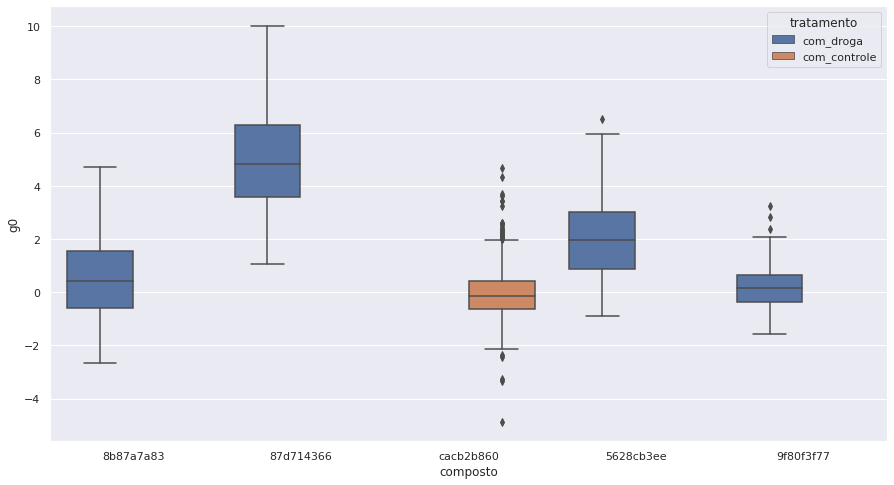

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y='g0', x='composto', hue='tratamento')

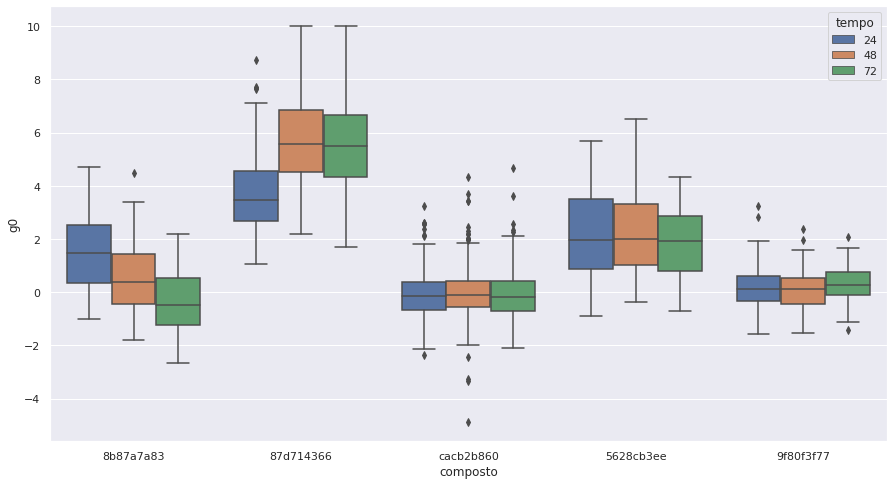

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y='g0', x='composto', hue='tempo')

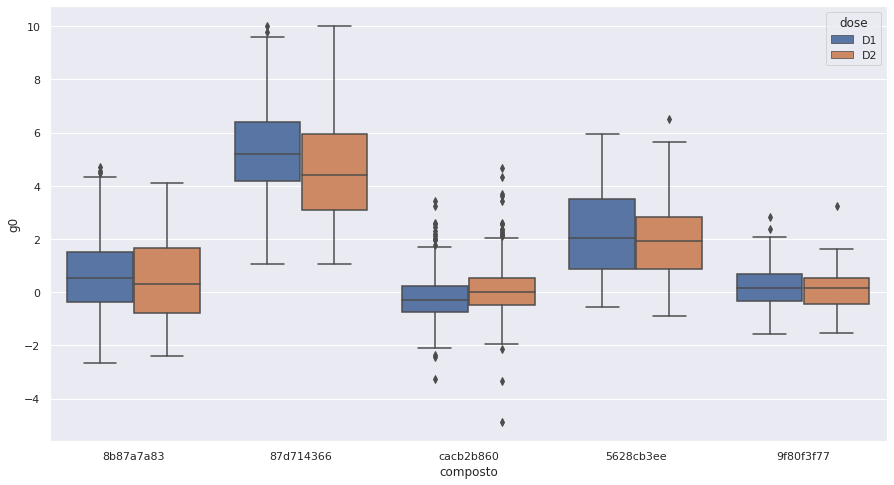

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y='g0', x='composto', hue='dose')

Os gráficos são muito bons para termos uma noção das modificações de ativação de moa conforma e variação de tempo ou dose, mas para dados mais exatos é melhor a confirmação por uma tabela agrupada.

In [ ]:
dados_combinados

id    tratamento  tempo dose  ... eh_controle  24h  48h  72h
0      id_000644bb2     com_droga     24   D1  ...           0    1    0    0
1      id_000779bfc     com_droga     72   D1  ...           0    0    0    1
2      id_000a6266a     com_droga     48   D1  ...           0    0    1    0
3      id_0015fd391     com_droga     48   D1  ...           0    0    1    0
4      id_001626bd3     com_droga     72   D2  ...           0    0    0    1
...             ...           ...    ...  ...  ...         ...  ...  ...  ...
23809  id_fffb1ceed     com_droga     24   D2  ...           0    1    0    0
23810  id_fffb70c0c     com_droga     24   D2  ...           0    1    0    0
23811  id_fffc1c3f4  com_controle     48   D2  ...           1    0    1    0
23812  id_fffcb9e7c     com_droga     24   D1  ...           0    1    0    0
23813  id_ffffdd77b     com_droga     72   D1  ...           0    0    0    1

[23814 rows x 883 columns]

In [ ]:
dados_agr = dados_combinados.copy()

In [ ]:
for c in composto_principal:
  dados_agr[c] = dados_agr['composto'] == c

In [ ]:
dados_agr

id    tratamento  tempo  ... 9f80f3f77 8b87a7a83  5628cb3ee
0      id_000644bb2     com_droga     24  ...     False     False      False
1      id_000779bfc     com_droga     72  ...     False     False      False
2      id_000a6266a     com_droga     48  ...     False     False      False
3      id_0015fd391     com_droga     48  ...     False     False      False
4      id_001626bd3     com_droga     72  ...     False     False      False
...             ...           ...    ...  ...       ...       ...        ...
23809  id_fffb1ceed     com_droga     24  ...     False     False      False
23810  id_fffb70c0c     com_droga     24  ...     False     False      False
23811  id_fffc1c3f4  com_controle     48  ...     False     False      False
23812  id_fffcb9e7c     com_droga     24  ...     False      True      False
23813  id_ffffdd77b     com_droga     72  ...     False     False      False

[23814 rows x 888 columns]

In [ ]:
dados_agr.groupby(['dose', 'tempo', 'tratamento']).agg({'cacb2b860': 'sum', '87d714366': 'sum', '9f80f3f77': 'sum', '8b87a7a83': 'sum', '5628cb3ee': 'sum'})

cacb2b860  87d714366  9f80f3f77  8b87a7a83  5628cb3ee
dose tempo tratamento                                                         
D1   24    com_controle        301          0          0          0          0
           com_droga             0        121         41         34         31
     48    com_controle        343          0          0          0          0
           com_droga             0        131         45         36         36
     72    com_controle        307          0          0          0          0
           com_droga             0        123         40         34         35
D2   24    com_controle        305          0          0          0          0
           com_droga             0        114         38         31         31
     48    com_controle        305          0          0          0          0
           com_droga             0        116         41         34         35
     72    com_controle        305          0          0          0          0
           com_droga             0        113         41         34         34

###Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

In [ ]:
dados_resultados['composto'] = dados['composto']

In [ ]:
dados_resultados

id  5-alpha_reductase_inhibitor  ...  ativo_moa   composto
0      id_000644bb2                            0  ...       True  b68db1d53
1      id_000779bfc                            0  ...      False  df89a8e5a
2      id_000a6266a                            0  ...       True  18bb41b2c
3      id_0015fd391                            0  ...      False  8c7f86626
4      id_001626bd3                            0  ...       True  7cbed3131
...             ...                          ...  ...        ...        ...
23809  id_fffb1ceed                            0  ...       True  df1d0a5a1
23810  id_fffb70c0c                            0  ...       True  ecf3b6b74
23811  id_fffc1c3f4                            0  ...      False  cacb2b860
23812  id_fffcb9e7c                            0  ...       True  8b87a7a83
23813  id_ffffdd77b                            0  ...      False  972f41291

[23814 rows x 210 columns]

In [ ]:
composto_drop = dados_resultados['composto'].value_counts() == 1
composto_drop = composto_drop.reset_index()
composto_drop

index  composto
0     cacb2b860     False
1     87d714366     False
2     9f80f3f77     False
3     8b87a7a83     False
4     5628cb3ee     False
...         ...       ...
3284  f5487e91f      True
3285  d75904698      True
3286  fe6105bde      True
3287  57f5932fb      True
3288  288e0d205      True

[3289 rows x 2 columns]

In [ ]:
composto_drop = composto_drop.loc[composto_drop['composto'] == True, 'index']
composto_drop = composto_drop.to_list()

In [ ]:
dados_filtrados = dados_resultados.drop(index=dados[dados['composto'].isin(composto_drop)].index)
dados_filtrados

id  5-alpha_reductase_inhibitor  ...  ativo_moa   composto
0      id_000644bb2                            0  ...       True  b68db1d53
1      id_000779bfc                            0  ...      False  df89a8e5a
2      id_000a6266a                            0  ...       True  18bb41b2c
3      id_0015fd391                            0  ...      False  8c7f86626
4      id_001626bd3                            0  ...       True  7cbed3131
...             ...                          ...  ...        ...        ...
23809  id_fffb1ceed                            0  ...       True  df1d0a5a1
23810  id_fffb70c0c                            0  ...       True  ecf3b6b74
23811  id_fffc1c3f4                            0  ...      False  cacb2b860
23812  id_fffcb9e7c                            0  ...       True  8b87a7a83
23813  id_ffffdd77b                            0  ...      False  972f41291

[23685 rows x 210 columns]

In [ ]:
compostos_ativa_dif = pd.DataFrame()
for col in dados_filtrados.columns[2:-3]:
  _col = dados_filtrados[dados_filtrados[col] == 1]
  for comp in _col['composto'].unique():
    _comp = _col[_col['composto'] == comp]
    compostos_ativa_dif = pd.concat([compostos_ativa_dif, _comp])

In [ ]:
compostos_ativa_dif = compostos_ativa_dif.drop('id', axis=1)

In [ ]:
compostos_ativa_dif

5-alpha_reductase_inhibitor  ...   composto
605                              0  ...  838575b1d
13006                            0  ...  838575b1d
13326                            0  ...  838575b1d
15787                            0  ...  838575b1d
16904                            0  ...  838575b1d
...                            ...  ...        ...
14349                            0  ...  2229f35a4
16796                            0  ...  2229f35a4
18101                            0  ...  2229f35a4
22007                            0  ...  2229f35a4
23665                            0  ...  2229f35a4

[16727 rows x 209 columns]

In [ ]:
compostos_ativa_dif.drop_duplicates(keep=False)

Empty DataFrame
Columns: [5-alpha_reductase_inhibitor, 11-beta-hsd1_inhibitor, acat_inhibitor, acetylcholine_receptor_agonist, acetylcholine_receptor_antagonist, acetylcholinesterase_inhibitor, adenosine_receptor_agonist, adenosine_receptor_antagonist, adenylyl_cyclase_activator, adrenergic_receptor_agonist, adrenergic_receptor_antagonist, akt_inhibitor, aldehyde_dehydrogenase_inhibitor, alk_inhibitor, ampk_activator, analgesic, androgen_receptor_agonist, androgen_receptor_antagonist, anesthetic_-_local, angiogenesis_inhibitor, angiotensin_receptor_antagonist, anti-inflammatory, antiarrhythmic, antibiotic, anticonvulsant, antifungal, antihistamine, antimalarial, antioxidant, antiprotozoal, antiviral, apoptosis_stimulant, aromatase_inhibitor, atm_kinase_inhibitor, atp-sensitive_potassium_channel_antagonist, atp_synthase_inhibitor, atpase_inhibitor, atr_kinase_inhibitor, aurora_kinase_inhibitor, autotaxin_inhibitor, bacterial_30s_ribosomal_subunit_inhibitor, bacterial_50s_ribosomal_subunit_inhibitor, bacterial_antifolate, bacterial_cell_wall_synthesis_inhibitor, bacterial_dna_gyrase_inhibitor, bacterial_dna_inhibitor, bacterial_membrane_integrity_inhibitor, bcl_inhibitor, bcr-abl_inhibitor, benzodiazepine_receptor_agonist, beta_amyloid_inhibitor, bromodomain_inhibitor, btk_inhibitor, calcineurin_inhibitor, calcium_channel_blocker, cannabinoid_receptor_agonist, cannabinoid_receptor_antagonist, carbonic_anhydrase_inhibitor, casein_kinase_inhibitor, caspase_activator, catechol_o_methyltransferase_inhibitor, cc_chemokine_receptor_antagonist, cck_receptor_antagonist, cdk_inhibitor, chelating_agent, chk_inhibitor, chloride_channel_blocker, cholesterol_inhibitor, cholinergic_receptor_antagonist, coagulation_factor_inhibitor, corticosteroid_agonist, cyclooxygenase_inhibitor, cytochrome_p450_inhibitor, dihydrofolate_reductase_inhibitor, dipeptidyl_peptidase_inhibitor, diuretic, dna_alkylating_agent, dna_inhibitor, dopamine_receptor_agonist, dopamine_receptor_antagonist, egfr_inhibitor, elastase_inhibitor, erbb2_inhibitor, estrogen_receptor_agonist, estrogen_receptor_antagonist, faah_inhibitor, farnesyltransferase_inhibitor, fatty_acid_receptor_agonist, fgfr_inhibitor, flt3_inhibitor, focal_adhesion_kinase_inhibitor, free_radical_scavenger, fungal_squalene_epoxidase_inhibitor, gaba_receptor_agonist, gaba_receptor_antagonist, gamma_secretase_inhibitor, glucocorticoid_receptor_agonist, glutamate_inhibitor, glutamate_receptor_agonist, glutamate_receptor_antagonist, ...]
Index: []

[0 rows x 209 columns]

A hipotese é de que existe uma droga que participa de pelo menos dois experimentos e que eles tenham ativações diferentes. Para verificar, primeiro eliminamos todas as entradas onde as drogas que participavam somente de um experimento e depois apagamos todas as entradas que possuim as mesmas drogas e ativavam os mesmos moas. Como o resultado final foi vazio, podemos descartar a hipótese de que existe uma drota que tenha ativação diferente conforme variação de tempo ou dose.

###Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

A resposta do desafio anterior já confira que não.

###Desafio 08: Resumo do que você aprendeu com os dados

Como adicionar várias colunas de um dataframe em outro dataframe com o merge.
Criar uma lista a partir de uma palavra de uma coluna.
Criar colunas booleana para indicar a presença ou não de um elemento de outra coluna, e depois usar o comando: 
**grouby(['col1', 'col2', ...]).agg({'colx': 'operação', 'coly': 'operação', ... })** para criar uma tabela comparando determinadas colunas com os determinados elementos.
Fazer uma laço de for ... in para verificar colunas, depois outro laço for ... in para verificar elementos nessas colunas e juntar isso num novo dataframe.
Que o comando **drop_duplicates(keep=False)** apaga todos os elementos que tenham duplicadas, não só as duplicadas

#Aula 5

Olá Cientista!

Seja bem vindo e bem vinda à aula 05. Parabéns por ter chegado até aqui!

Na última aula nós analisamos separadamente, através de algumas técnicas, os efeitos em cada gene do grupo "com_tratamento" usados. Além disso utilizamos o boxplot para nos auxiliar na análise de forma visual tirando algumas conclusões muito interessantes.

Você conseguiu fazer todos os desafios? Então vamos mergulhar juntos na aula 05!

Nesta aula, vamos entender e aplicar o Machine Learning. Primeiramente, vamos entender o que o ML significa. Existem muitas definições para o termo, mas aqui, vamos trazer a definição clássica de um renomado e importante cientista da computação, o Arthur Samuel.

“Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed” – (definição clássica de Arthur Samuel, cientista da computação, 1959)

Tradução livre: "Machine Learning é um campo de estudo que dá aos computadores a habilidade de aprender sem terem sido programados para tal."

Podemos interpretar a definição de Samuel, da seguinte forma: para que um computador reconheça determinada imagem, não precisamos passar um conjunto de regras, mostrar vários exemplos é suficiente para que o computador classifique suas imagens. Sendo assim, temos dois fatores determinantes neste processo: um conjunto de dados suficientemente grande e um poder computacional elevado. Por isso, até os anos 2000, era bem difícil encontrarmos problemas significantes resolvidos através do Machine Learning. Mas, a partir de 2009, empresas como a Netflix e Amazon, começaram a resolver problemas reais com o processamento dos dados através no ML, isso porque tinham uma infinidade de dados disponíveis e alto poder computacional.

E quais problemas podemos resolver com esse tipo de algoritmo? Existem diversos casos em que podemos aplicá-los mas, vamos subdividir em dois grandes grupos:

- Problemas em que somos muito bons em resolver mas o Machine Learning, leva essa produção à um nível industrial, como é o caso da classificação de imagens
- Problemas em que não somos tão bons em resolver e o Machine Learning pode tomar uma melhor decisão em relação à nossa (imparcialidade, pode ser um fator), como é o caso da concessão de crédito.

Mas como o Machine Learning vai ser aplicado no nosso problema? Bom, utilizando a nossa base de dados dados_combinados, o primeiro problema que pensamos em resolver é: dado os experimentos, queremos saber se qualquer mecanismo de ação foi ativado ou não ativado. Ou seja, este caso é um problema de classificação binária.

Mas, também podemos pensar se dado os experimentos, queremos saber se um determinado mecanismo de ação foi ativado, recebendo como resposta, o composto relacionado. E aqui, temos um problema de classificação multiclasse, já que cada composto químico é considerado uma classe diferente.

In [ ]:
dados_combinados.head()

id tratamento  tempo dose  ...    c-99  n_moa  ativo_moa  eh_controle
0  id_000644bb2  com_droga     24   D1  ...  0.4176      1       True            0
1  id_000779bfc  com_droga     72   D1  ...  0.7371      0      False            0
2  id_000a6266a  com_droga     48   D1  ...  0.6931      3       True            0
3  id_0015fd391  com_droga     48   D1  ... -0.8154      0      False            0
4  id_001626bd3  com_droga     72   D2  ...  0.7125      1       True            0

[5 rows x 880 columns]

Mas, na nossa base dados_resultados nós encontramos o ID do composto e quais mecanismos de ação foram acionados por determinado experimento. Aqui, como um composto pode acionar mais de um mecanismo, nós teremos uma classificação multilabel (quando uma única instância pode ter mais de uma classe associada) e, através de um algoritmo de Machine Learning nós também podemos resolver este problema: não somente ter como retorno se um mecanismo de ação foi ativado mas qual ou quais são estes mecanismos.

É importante lembrar que nossas bases de dados estão separadas com um propósito. A segunda dados_resultados é como se fosse a resposta da primeira e foi construída por cientistas que analisaram o efeito de um determinado composto nos mais de 700 genes. Esse conhecimento, virou uma base de dados com o passar dos anos e é fruto de análise científica.

E o papel de um modelo de ML neste caso é, a partir de todo esforço humano empenhado por vários anos para entender e tabular qual efeito de um composto quimíco em uma determinada expressão gênica, ser treinado e aprender, ou seja, ser capaz de produzir resultados compatíveis com aqueles feitos pelos(as) próprios(as) cientistas.

Aqui na imersão, vamos começar resolvendo o problema menos complexo, a classificação binária: dado os experimentos, queremos saber se QUALQUER mecanismo de ação foi ativado ou não. Basicamente, queremos que o modelo faça predições compatível com a última coluna da nossa base de dados dados_combinados, a ativo_moa.

In [ ]:
dados_resultados.head()

id  5-alpha_reductase_inhibitor  ...  n_moa  ativo_moa
0  id_000644bb2                            0  ...      1       True
1  id_000779bfc                            0  ...      0      False
2  id_000a6266a                            0  ...      3       True
3  id_0015fd391                            0  ...      0      False
4  id_001626bd3                            0  ...      1       True

[5 rows x 209 columns]

As etapas lógicas do nosso processo é:

Dado um composto -> temos a nossa assinatura celular (```g e c```) -> analisamos o(s) mecanismo(s) de ação ativados (MoA) 

Mas, a nossa pergunta a ser respondida é, "Dado um composto e uma assinatura celular, houve algum MoA ativado?" Então, as etapas lógicas passam a ser:

Composto -> assinatura celular -> MoA ativado?

E como nosso modelo vai aprender a partir da nosa base de dados?

Composto 1 -> Assinatura A -> MoA = 1
Composto 2 -> Assinatura B -> MoA = 0
Composto 3 -> Assinatura C -> MoA = 1
...
Composto N -> Assinatura N -> MoA = 0

Ou seja, toda a nossa base de dados dados_combinados será a fonte de aprendizado do nosso modelo. Onde, cada experimento (linha) representa um exemplo (assinatura) já que temos a reunião de todas as informações necessárias para criar a nossa classificação binária e, terá como variável resposta, também chamada de target, a coluna ativo_moa, uma variável binária (0, 1).

E, por fim, o nosso modelo deverá ser capaz de resolver o seguinte problema:

Composto candidato -> Assinatura X -> MoA = 1 OU MoA = 0?

Existem diversas técnicas de ML que são capazes de solucionar o nosso problema mas aqui, vamos usar a Regressão Logística e, essa técnica já está implementada em uma biblioteca bastante usada e bem importante para ML no Python, o Scikit-Learn.

Sugerimos que você leia essa documentação e se familiarize com esta biblioteca, ela será muito importante na sua trajetória como Cientista de Dados. E, clicando em "Classification" na página inicial, encontramos, no primeiro capítulo, chamado "Linear Models", o nosso subtítulo de interesse: "1.1.11 Logistic Regression".

Quando implementamos um modelo de classificação, precisamos separar a nossa base de dados em base de treino e base de teste. A base de treino, vai ser onde o nosso modelo vai aprender e, a base de teste serve para a verificação do aprendizado do modelo, ou seja, poderemos entender se, de fato, as previsões do nosso modelo estão de acordo com o esperado.

Não podemos treinar e testar o modelo com o mesmo conjunto de dados porque, seria muito mais fácil dele prever corretamente. A base de dados de teste, funciona como um novo conjunto onde poderemos medir o quanto o nosso modelo está acertando, dado que já temos a variável resposta real.

Para fazer esta divisão, usamos uma função do Scikit-Learn chamada train_teste_split (como já aprendemos, para usar uma biblioteca ou função, precisamos, primeiramente, fazer a importação padrão e, neste caso, usaremos from sklearn.model_selection import train_test_split).

Para fazer a divisão da base de dados, é necessário definir qual será o nosso x e o nosso y. Um modelo matemático, define um y em função de um x, ou seja, f(x) = y. Neste projeto, o nosso y será o target, ativo_moa e, ele será definido a partir de uma assinatura (conjunto composto por g + c ou , expressão gênica + viabilidade celular).

Assim, teremos:

x = dados_combinados.select_dtypes('float64')  ->  toda a base de dados que tem os valores com o formato, ```float64```, no nosso caso, todas as variáveis ```g``` e ```c```

y = dados_combinados['ativo_moa']  ->  apenas a coluna target, ou seja, ```ativo_moa```

Para o train_test_split definiremos:

x_treino, x_teste, y_treino, y_teste

E a função receberá como parâmetro:

train_test_split(x, y, test_size = 0.2)

Onde,

x -> base de dados definida como x, no nosso caso, todas as variáveis ```g``` e ```c```

y -> variável resposta, no nosso caso, ```ativo_moa```

teste_size = 0.2 -> tamanho que definimos para a base de teste

A proporção entre treino e teste, varia de acordo com o volume de dados que temos. Mas, usualmente, encontramos proporções 30/70, 25/75 ou 20/80. Aqui, definimos como 0,2 ou 20%, isso significa que a base de treino será composta pelos 80% restante.

Separando treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

Agora, podemos fazer a nossa primeira regressão logística.

O primeiro passo, é definir o nosso x, y e o x_treino, x_teste, y_treino, y_teste do train_test_split.

Após isso, definimos um nome para o nosso modelo (modelo_rlogistica) e declaramos a função LogisticRegression(). Acrescentamos um parâmetro max_iter = 1000 no modelo para que ele seja capaz de convergir para um resultado e assim, não recebemos nenhum warning no resultado.

Em seguida, ajustamos o modelo com o .fit(x_treino, y_treino) (lembrando que os argumentos desta função são x e y e, usamos x_treino e y_treino porque será através dessas bases que o algoritmo aprenderá).

E, por fim, usamos a função .score(x_teste, y_teste) para verificar como o nosso modelo ajustado está se saindo nos dados de teste. O score()calcula a acurácia, ou seja, quantas predições o nosso modelo acertou na base de teste.

Como resultado, temos o valor da acurácia: ~0,627. Então, concluímos que o nosso modelo está acertando ~62% das previsões (caso tivéssemos 100 experimentos, o modelo acertaria 62 casos e erraria 38 casos).

Mas, como podemos estabelecer se este é um bom valor de acurácia ou não?

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6267058576527399

Para estabelecer se temos um bom valor de acurácia, precisamos de uma base comparativa, quer dizer, preciso dos resultados de um outro modelo para entender se estamos acertando mais ou menos casos.

Para isso, o Scikit-Learn, já tem implementado alguns algoritmos que fazer modelos menos complexos e que podem ser usados como base comparativa. Neste caso, vamos usar o DummyClassifier.

O processo para ajustar este modelo é muito parecido com aquele que usamos para a regressão logística: dividimos a base em treino e teste, definimos um nome para esse modelo e o instanciamos, o ajustamos com os dados de treino e, ao final, verificamos a acurácia com o conjunto teste.

Ao instanciarmos o DummyClassifier, precisamos definir a estratégia que ele usará para fazer o ajuste do modelo. No nosso caso, definimos a estratégia será os dados mais frequentes, isso quer dizer que: dado o valor mais frequente da nossa variável resposta (ativo_moa), o modelo Dummy vai chutar que todos os eventos da base de dados assumem aquele valor no target. Assim, temos: DummyClassifier('most_frequent').

Nesse momento, para calcular a acurácia, vamos usar outra estratégia, a função accuracy_score também do Scikit-Learn. Ela receberá como parâmetros a base teste da variável resposta (y_teste) e as previsões do modelo que, até o momento ainda não calculamos. Para calcular as previsões, usamos o .predict() da mesma biblioteca que, receberá como parâmetro a base x_teste. Por fim, o cálculo da acurácia será:

previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

A acurácia do DummyClassifierfoi de ~60,7%, isso significa que nosso modelo LogisticRegression teve um desempenho um pouco melhor.

Classificação "Burra"

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

Podemos entender a acurácia do DummyClassifier se fizermos um value_counts normalizado e então verificamos que a proporção entre a classe 0 e a classe 1 é 60/30, ou seja, o valor mais frequente (estratégia usada no DummyClassifier) representa 60% da base de dados. Isso quer dizer que, caso o modelo chutasse a mesma classe para todos os eventos da base de teste, teríamos um acerto de 60% dos casos.



In [ ]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

Entretanto, toda vez que rodamos tanto a nossa regressão logística, quanto o nosso dummy classifier, recebemos como retorno um valor diferente de acurácia, apesar de em muitos casos, serem próximos.

O train_test_split a base de dados em subconjuntos aleatórios de treino e teste. Isso significa que toda vez que você executá-lo, você obterá um resultado diferente.

Por outro lado, se você declarar o parâmetro random_state = n, poderá garantir que a saída de todas as execuções será igual, ou seja, sua divisão será sempre a mesma. Não importa qual número você escolherá para o random_state, o importante é que toda vez que você usá-lo, sempre terá a mesma saída.

Além do random_state, existe mais um parâmetro bem importante que deve ser levado em consideração na divisão da nossa base de dados, o stratify.

Se repararmos na divisão da variável ativo_moa, entre true e false, percebemos que segue um balanceamento 60/40. E, é do nosso interesse que as bases de treino e teste sigam, além de uma divisão reprodutível (garantida com random_state), a proporção original do conjunto de dados. Assim, atribuimos stratify = coluna, onde coluna = nome da coluna que o stratify deve levar em consideração a proporção de classes. No nosso caso, usamos stratify = y, pois y é a nossa variável resposta e, é dela que o stratify deve considerar a proporção: 60/40.

Esses parâmetros são úteis, porque garantimos que os resultados são reproduzíveis e compatíveis, independente do modelo (qual técnica, por exemplo, regressão logística, dummy classifier, árvore de decisão e etc) que vamos treinar e testar a partir desta divisão.

Ou seja, ao final, nosso train_teste_split ficará:

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
Nesse momento, temos interesse a explorar outras técnicas de modelagem para comparar os resultados obtidos e ver qual o melhor algoritmo que conseguimos produzir.

Sendo assim, vamos testar uma nova técnica: a árvore de decisão.

Novamente, a sequência lógica para ajustar esse novo modelo é muito parecida com que estávamos vendo até o momento: definimos as bases x e y, fazemos o train_test_split, declaramos o novo modelo, ajustamos e verificamos a acurácia.

Aqui, vamos usar o DecisionTreeClassifier, também da biblioteca Scikit-Learn. O único parâmetro que vamos declarar para esta função será o max_depth = 3 mas, vamos explorar seu significado a seguir.

Como resultado, temos uma acurácia (calculada a partir da base de teste) de ~0,61% e, é um pouco menos do que a acurácia obtida com a regressão logística.

Aplicando Árvores

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

Agora, vamos entender melhor como funciona uma árvore de decisão e o que significa o parâmetro max_depth = 3. Plotamos uma imagem que representa o nosso modelo e, nesse momento, é importante que você não se apegue ao código que usamos para isso. O que realmente é relevante é entender o algoritmo!

A figura é dividida em 4 níveis e, o primeiro nível (estamos considerando a orientação de cima para baixo), é composto por apenas um quadro que é chamado de nó raíz ou somente raíz e ele tem como regras, os melhores atributos que podem dividir a nossa base de dados em dois conjuntos distintos (lembrando que nosso objetivo é separar a nossa base de dados em mecanismo de ação ativado ou não ativado).

Entre o primeiro e o segundo nível (e nos demais níveis), temos duas setas: uma para a direita e outra para a esquerda. Essas setas são chamadas de ramos e subdividem o nível acima em dois outros conjuntos que separam novamente os dados em mecanismo de ação ativado ou não ativado, a partir de uma decisão.

O último nível da árvore (mais abaixo), apresenta n quadros que apresentam características que devem ser levadas em conta na hora da classificação e se dividem em class = ativado e class = não ativado. Esse nível não apresenta mais ramificações e, esses quadros são chamados de folhas.

Se reparmos, a nossa árvore tem 3 níveis de decisão a partir da raíz e é exatamente isso que o parâmetro max_depthrepresenta: a profundidade da árvore.



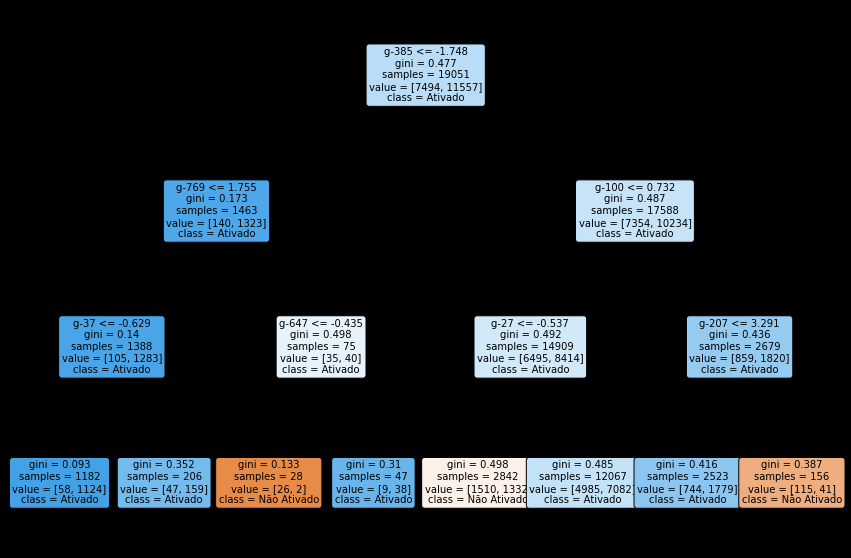

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()


Como vimos, o desempenho do nosso novo modelo com apenas 3 camadas de decisão não foi tão satisfatório assim. Por isso, vamos variar o max_depth dentro de um intervalo de valores (range) e comparar os resultados obtidos.

O processo para obter os valores que queremos, é sempre o mesmo. Por isso, vamos criar um loop ou um laço de repetição (um loop, executa um bloco de código em repetição enquanto uma condição é atendida).

Então, após fazermos a separação da base de dados em x e y e dividí-las no train_test_split, vamos criar um for para que nosso modelo seja treinado e testado em repetição dentro de um range. Para isso, faremos:

teste=[]  ->  criando lista para armazenar os resultados da acurácia nos dados de teste 
treino=[]  ->  criando lista para armazenar os resultados da acurácia nos dados de treino 
for i in range(1,15):  ->  estabelecendo condição que deve ser atendida (i) e range de valor (range(1, 15))
    modelo_arvore = DecisionTreeClassifier(max_depth = i)  ->  instanciando modelo que será treinado e definindo max_depth = i, ou seja, estamos variando a profundidade da nossa árvore
    modelo_arvore.fit(x_treino, y_treino)  ->  ajustando o modelo a partir das bases de treino
    teste.append(modelo_arvore.score(x_teste, y_teste))  ->  armazenando os resultados de acurácia de teste dos modelos produzidos na lista 'teste'
    treino.append(modelo_arvore.score(x_treino, y_treino))  ->  armazenando os resultados de acurácia de treino dos modelos produzidos na lista 'treino'
Visualizando o Sobre Ajuste


In [ ]:
teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

Quando chamamos as saídas do nosso for (teste e treino), podemos observar um comportamento um pouco estranho: enquanto nos dados de teste, o valor da nossa acurácia vai caindo, nos dados de treino, esse valor vai aumentando.



Para investigar o que aconteceu, vamos plotar um gráfico para entender o comportamento combinado dessas listas.

Usaremos o lineplot do Seaborn para construir essa visualização. Como parâmetros, teremos:

x = range(1, 15)   ->  intervalo que usamos no for
y = teste e y = treino  ->  listas criamos no for e será usada no eixo y do gráfico
label = 'teste' e label = 'teste'  ->  etiqueta para identificar as duas linhas que estarão no gráfico 

Observando o gráfico produzido, podemos perceber que, inicialmente, os valores de treino e teste são muito próximos mas, conforme vamos aumentando o range, o valor da acurácia para os dados de treino aumentam muito enquanto, esse mesmo valor para os dados de teste, vai caindo (as linhas vão se afastando).

Isso significa que, conforme aumentamos a profundidade da nossa árvore de decisão, a classificação para os dados de treino ficam muito boas pois, ela consegue captar muito bem as características desses dados. Mas, em contrapartida, o modelo fica tão bom os dados de treino que, quando apresentamos um novo conjunto de dados (teste), ele não consegue generalizar tão bem e assim, temos uma acurácia em queda.

Esse problema de um modelo com performance muito boa nos dados de treino mas performance em queda nos dados de teste, é muito conhecido na ciência de dados e chamamos de overfitting.

Então, conseguimos perceber que, para melhorar o nosso modelo, não é suficiente somente aumentar a profundidade da árvore de decisão e assim, precisamos traçar uma outra etratégia para melhorar a performance do nosso modelo.

Nesse momento, vamos testar uma nova técnica de modelagem: o Random Forest. O que este modelo faz é criar várias árvores de decisões na qual ele considera amostras aleatórias do nosso conjunto total.

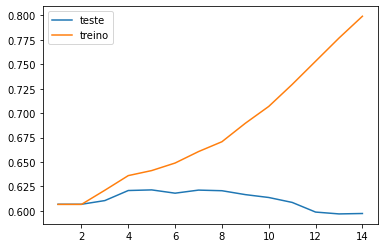

In [ ]:
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

A função que treina um modelo de Random Forest (RandomForestClassifier()) não aceita que tenhamos variáveis em formato de string. Por isso, precisamos tratar as variáveis que são strings e transformá-las em números (ou no formato float64).

Para fazer essa transformação, vamos usar uma função do Pandas, chamada get_dummies e nela, declaramos a coluna que queremos que seja transformada. Por exemplo, aqui, usamos:

pd.get_dummies(dados_combinados['tratamento'])

Isso porque, nossa intenção é transformar a coluna tratamento da base dados_combinados em dados numéricos.

Para fazer a transformação desejada, o get_dummies pega todas as categorias de uma variável e as transforma em novas colunas binárias. Por exemplo:

A variável tratamento apresenta duas categorias com_controle e sem_controle. Quando aplicamos o get_dummies, ele cria duas novas colunas binárias e análogas as categorias. Se temos um evento que apresentava na coluna original a marcação com_droga, agora ela apresentará valor 0 na coluna com_controle e valor 1 na coluna com_droga e vice-versa.

In [ ]:
pd.get_dummies(dados_combinados['tratamento'])

com_controle  com_droga
0                 0          1
1                 0          1
2                 0          1
3                 0          1
4                 0          1
...             ...        ...
23809             0          1
23810             0          1
23811             1          0
23812             0          1
23813             0          1

[23814 rows x 2 columns]

Agora que entendemos como o get_dummies funciona, podemos transformar todas as nossas variáveis de interesse: tratamento, dose e tempo.

Para isso, declaramos a base de dados completa e, no parâmetro columns, listamos as variáveis que devem ser transformadas. Assim teremos:

pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])


In [ ]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

id   composto     g-0  ...  tempo_24  tempo_48  tempo_72
0      id_000644bb2  b68db1d53  1.0620  ...         1         0         0
1      id_000779bfc  df89a8e5a  0.0743  ...         0         0         1
2      id_000a6266a  18bb41b2c  0.6280  ...         0         1         0
3      id_0015fd391  8c7f86626 -0.5138  ...         0         1         0
4      id_001626bd3  7cbed3131 -0.3254  ...         0         0         1
...             ...        ...     ...  ...       ...       ...       ...
23809  id_fffb1ceed  df1d0a5a1  0.1394  ...         1         0         0
23810  id_fffb70c0c  ecf3b6b74 -1.3260  ...         1         0         0
23811  id_fffc1c3f4  cacb2b860  0.3942  ...         0         1         0
23812  id_fffcb9e7c  8b87a7a83  0.6660  ...         1         0         0
23813  id_ffffdd77b  972f41291 -0.8598  ...         0         0         1

[23814 rows x 884 columns]

Aqui, estamos estabelecendo qual será a base de dados usada para modelar o novo algoritmo. Agora, não mais consideraremos apenas os dados genéticos, também levaremos em conta as demais variáveis, exceto as seguintes variáveis:

'id'  ->  não será relevante nesse momento pois é somente um número de identificação
'n_moa'  ->  não será relevante nesse momento pois é a quantidade de MoAs ativados
'ativo_moa'  ->  retiramos da base pois é a nossa variável resposta
'composto'  ->  não será relevante nesse momento pois identifica o composto usado e foge do que estamos buscando fazer

Para retirar essas variáveis da nossa base de dados, usamos a função drop, declaramos as variáveis a serem retiradas em forma de uma lista e identificamos que são colunas através do parâmetro axis = 1.



In [ ]:
dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

tratamento  tempo dose     g-0  ...    c-97    c-98    c-99  eh_controle
0         com_droga     24   D1  1.0620  ...  0.2139  0.3801  0.4176            0
1         com_droga     72   D1  0.0743  ...  0.1241  0.6077  0.7371            0
2         com_droga     48   D1  0.6280  ... -0.2187 -1.4080  0.6931            0
3         com_droga     48   D1 -0.5138  ... -0.8784 -0.3876 -0.8154            0
4         com_droga     72   D2 -0.3254  ...  0.2885 -0.3786  0.7125            0
...             ...    ...  ...     ...  ...     ...     ...     ...          ...
23809     com_droga     24   D2  0.1394  ...  0.9171  0.5258  0.4680            0
23810     com_droga     24   D2 -1.3260  ... -0.1224 -0.2715  0.3689            0
23811  com_controle     48   D2  0.3942  ...  0.7592  0.6656  0.3808            1
23812     com_droga     24   D1  0.6660  ...  0.7015 -0.6290  0.0740            0
23813     com_droga     72   D1 -0.8598  ... -0.4775 -2.1500 -4.2520            0

[23814 rows x 876 columns]


Enfim, podemos partir para o ajuste do nosso modelo de Random Forest.

Novamente, vamos seguir as mesmas etapas lógicas anteriores. Entretando, precisamos modificar o a nossa base x. Então faremos:

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)  ->  base de dados de deve ser considerada com a exclusão das colunas que determinamos anteriormente
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])  ->  a partir do x definido acima, fazemos a transformação com o get_dummies nas colunas com o formato de string

Por fim, temos como retorno uma acurácia de ~68,0% e, ela é, aproximadamente, 7% melhor que a acurácia que conseguimos com o DummyClassifier. Aqui, não podemos comparar com a regressão logística porque estamos considerando um outro conjunto de dados.

É muito importante ressaltar que, apesar de termos melhorado a acurácia do nosso modelo, pensando na vida real, talvez a nossa melhora ainda não seja suficiente. Ou seja, desenvolvemos um modelo com um algoritmo de Machine Learning mas, ele ainda não é aplicável à vida real (isso quer dizer que, ainda não nos traz ganhos suficientes para sua implantação).

Por outro lado, durante todo o nosso projeto, desenvolvemos modelos simples e não nos aprofundamos em todos os pontos que podem ser modificados (variáveis, parâmetros de modelos, por exemplo) a fim de otimizar a nossa generalização. Deixamos em destaque também a sua trajetória até aqui, certamente ela deve ser seu foco (e é também o nosso)! O resultado é apenas uma consequência disso tudo e sabemos que, para melhorá-lo você precisa persistir no estudo dessa área.

A Imersão de Dados 3 foi o seu primeiro passo na ciência de dados e aqui, deixamos o convite para que você continue estudando, explorando e aprendendo todos os processos e áreas desse mundo gigantesco de possibilidades!

Nos vemos em breve, cientistas!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)


0.6464413184967458

###Desafio 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

Vamos tentar variar o tamanho da divisão entre treino e teste para ver se a variação consistente no resultados conforme a variação da divisão

In [ ]:
x = dados_combinados.select_dtypes('float64')
tamanho_teste = []
for s in range(1,10):
  t = s/10
  x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = t, stratify=y, random_state=376)
  modelo_rlogistica = LogisticRegression(max_iter=1000)
  modelo_rlogistica.fit(x_treino, y_treino)
  tamanho_teste.append(modelo_rlogistica.score(x_teste, y_teste))

In [ ]:
tamanho_teste

[0.6309823677581864,
 0.6267058576527399,
 0.6292512246326102,
 0.6331093848414865,
 0.6243386243386243,
 0.6186577087269928,
 0.6157168566286743,
 0.59804744908671,
 0.5796202118228899]

In [ ]:
tamanho_teste = []
for s in range(1,10):
  t = s/10
  x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = t, stratify=y, random_state=376)
  modelo_arvore = DecisionTreeClassifier(max_depth = 3)
  modelo_arvore.fit(x_treino, y_treino)
  tamanho_teste.append(modelo_arvore.score(x_teste, y_teste))

In [ ]:
tamanho_teste

[0.6083123425692695,
 0.6105395758975436,
 0.6064380685794262,
 0.6070753726642872,
 0.6047703031830016,
 0.6145986423122681,
 0.5911817636472706,
 0.6120092378752887,
 0.6118602155554519]

In [ ]:
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
tamanho_teste = []
for s in range(1,10):
  t = s/10
  x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = t, stratify=y, random_state=376)
  modelo_randomforest = RandomForestClassifier()
  modelo_randomforest.fit(x_treino, y_treino)
  tamanho_teste.append(modelo_randomforest.score(x_teste, y_teste))

In [ ]:
tamanho_teste

[0.6863979848866498,
 0.6865420953180769,
 0.6856543037088874,
 0.6874868780180559,
 0.6848072562358276,
 0.6846525299181189,
 0.6814037192561487,
 0.682605500734831,
 0.6796528717398405]

Variar o tamanho do grupo de treino não mostrou resultados positivos. Vamos tentar regressão linear.

In [ ]:
from sklearn.linear_model import LinearRegression
x = dados_combinados.select_dtypes('float64')

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_linerregression = LinearRegression()
modelo_linerregression.fit(x_treino, y_treino)
modelo_linerregression.score(x_treino, y_treino)

0.1516288379690709

###Desafio 02: Estude a documentação do Sklearn.
https://scikit-learn.org/stable/index.html


###Desafio 03: Pesquisar o fluxograma 'Escolhendo o melhor modelo' choosing the right estimator
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

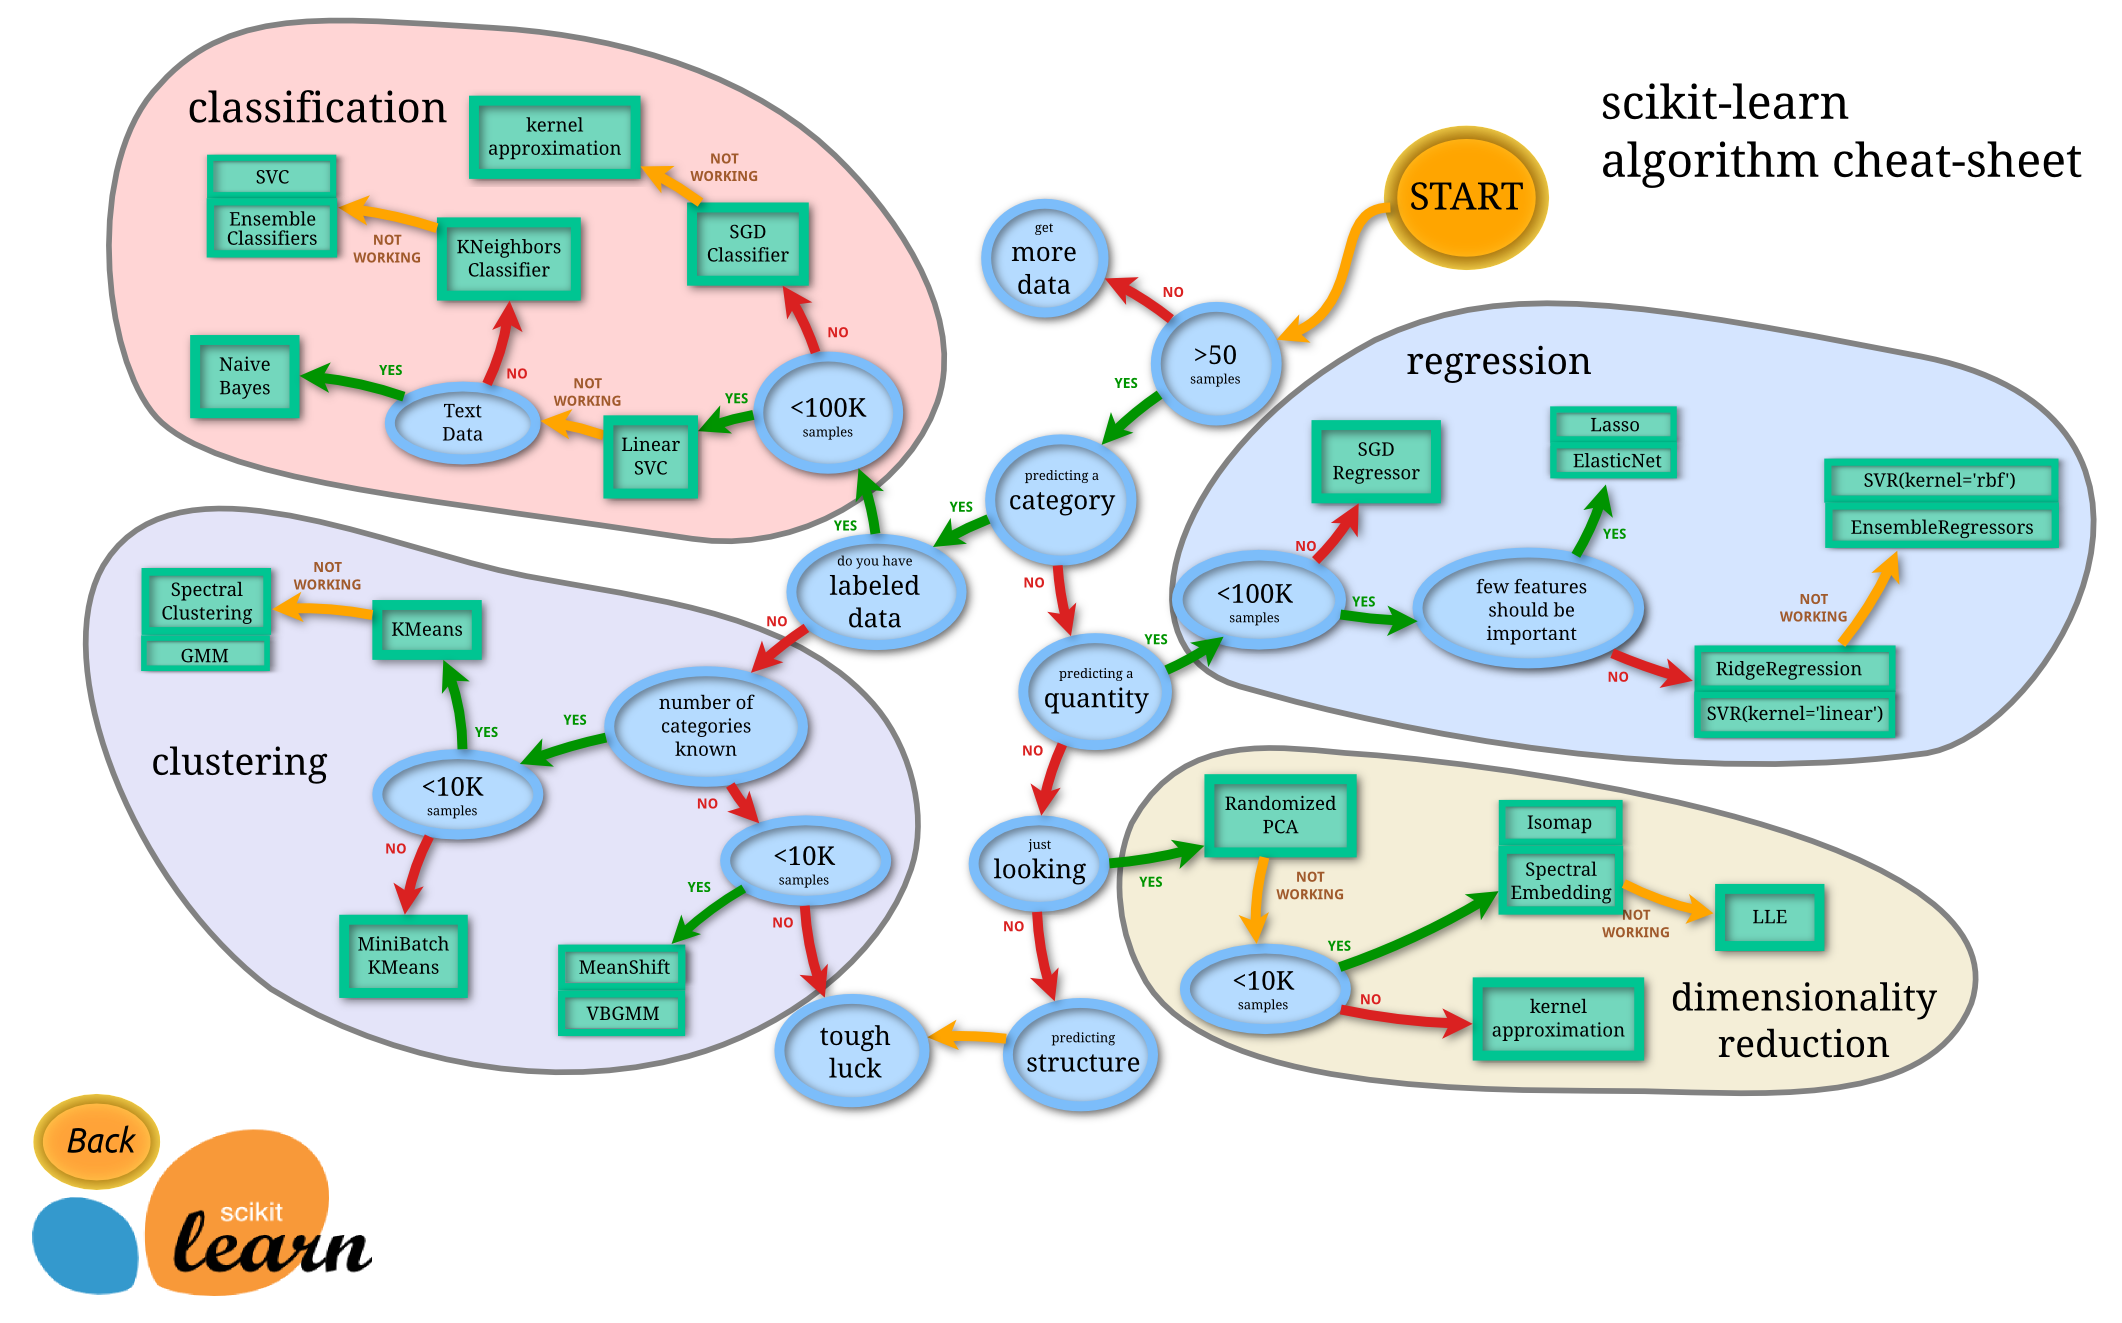

De acordo com o mapa, o modelo ideal seria o LinearSVC a principio, e depois testar com KNClassifier depois SCV e emsambles.

###Desafio 04: Teste outras problemas (perguntas). 0, 1 ou +.

In [ ]:
dados_comb = dados_combinados.copy()

In [ ]:
dados_comb.head()

id tratamento  tempo dose  ... eh_controle  24h  48h  72h
0  id_000644bb2  com_droga     24   D1  ...           0    1    0    0
1  id_000779bfc  com_droga     72   D1  ...           0    0    0    1
2  id_000a6266a  com_droga     48   D1  ...           0    0    1    0
3  id_0015fd391  com_droga     48   D1  ...           0    0    1    0
4  id_001626bd3  com_droga     72   D2  ...           0    0    0    1

[5 rows x 883 columns]

In [ ]:
dados_comb['n_moa'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: n_moa, dtype: int64

Como as maiores ativações são com 1, 0, 2 e 3 vou verifocar os modelos de regressão logistica e arvore de descisão para as circunstâncias 1 ou mais, 2 ou mais, 3 ou mais, 0 ativações, 1 ativação, 2 ativações e 3 ativações.

In [ ]:
dados_comb['1+'] = dados_comb['n_moa'] >= 1

In [ ]:
x_1mais = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '1+'], axis=1)
x_1mais = pd.get_dummies(x_1mais, columns=['tratamento', 'dose', 'tempo'])
y_1mais = dados_comb['1+']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_1mais, y_1mais, test_size = 0.2, stratify=y_1mais, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_1mais = accuracy_score(y_teste, previsao_dummy)
dummy_1mais

0.6067604450976275

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_1mais = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_1mais

0.6644971656519001

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_1mais = modelo_arvore.score(x_teste, y_teste)
arvore_1mais

0.686122191895864

In [ ]:
del dados_comb['1+']

In [ ]:
dados_comb['zero'] = dados_comb['n_moa'] == 0

In [ ]:
x_0 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', 'zero'], axis=1)
x_0 = pd.get_dummies(x_0, columns=['tratamento', 'dose', 'tempo'])
y_0 = dados_comb['zero']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_0, y_0, test_size = 0.2, stratify=y_0, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_zero = accuracy_score(y_teste, previsao_dummy)
dummy_zero

0.6067604450976275

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_zero = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_zero

0.6697459584295612

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_zero = modelo_arvore.score(x_teste, y_teste)
arvore_zero

0.6890615158513542

In [ ]:
del dados_comb['zero']

In [ ]:
dados_comb['2+'] = dados_comb['n_moa'] >= 2

In [ ]:
x_2mais = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '2+'], axis=1)
x_2mais = pd.get_dummies(x_2mais, columns=['tratamento', 'dose', 'tempo'])
y_2mais = dados_comb['2+']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_2mais, y_2mais, test_size = 0.2, stratify=y_2mais, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_2mais = accuracy_score(y_teste, previsao_dummy)
dummy_2mais

0.9195884946462314

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_2mais = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_2mais

0.9506613478899854

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_2mais = modelo_arvore.score(x_teste, y_teste)
arvore_2mais

0.945832458534537

In [ ]:
del dados_comb['2+']

In [ ]:
dados_comb['3+'] = dados_comb['n_moa'] >= 3

In [ ]:
x_3mais = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '3+'], axis=1)
x_3mais = pd.get_dummies(x_3mais, columns=['tratamento', 'dose', 'tempo'])
y_3mais = dados_comb['3+']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_3mais, y_3mais, test_size = 0.2, stratify=y_3mais, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_3mais = accuracy_score(y_teste, previsao_dummy)
dummy_3mais

0.9842536216670166

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_3mais = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_3mais

0.9754356498005459

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_3mais = modelo_arvore.score(x_teste, y_teste)
arvore_3mais

0.9857232836447617

In [ ]:
del dados_comb['3+']

In [ ]:
dados_comb['um'] = dados_comb['n_moa'] == 1

In [ ]:
x_1 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', 'um'], axis=1)
x_1 = pd.get_dummies(x_1, columns=['tratamento', 'dose', 'tempo'])
y_1 = dados_comb['um']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_1, y_1, test_size = 0.2, stratify=y_1, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_um = accuracy_score(y_teste, previsao_dummy)
dummy_um

0.5263489397438589

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_um = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_um

0.630065085030443

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_um = modelo_arvore.score(x_teste, y_teste)
arvore_um

0.6466512702078522

In [ ]:
del dados_comb['um']

In [ ]:
dados_comb['dois'] = dados_comb['n_moa'] == 2

In [ ]:
x_2 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', 'dois'], axis=1)
x_2 = pd.get_dummies(x_2, columns=['tratamento', 'dose', 'tempo'])
y_2 = dados_comb['dois']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_2, y_2, test_size = 0.2, stratify=y_2, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_dois = accuracy_score(y_teste, previsao_dummy)
dummy_dois

0.9353348729792148

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_dois = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_dois

0.9603191266008818

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_dois = modelo_arvore.score(x_teste, y_teste)
arvore_dois

0.963258450556372

In [ ]:
del dados_comb['dois']

In [ ]:
dados_comb['tres'] = dados_comb['n_moa'] == 3

In [ ]:
x_3 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', 'tres'], axis=1)
x_3 = pd.get_dummies(x_3, columns=['tratamento', 'dose', 'tempo'])
y_3 = dados_comb['tres']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_3, y_3, test_size = 0.2, stratify=y_3, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
dummy_tres = accuracy_score(y_teste, previsao_dummy)
dummy_tres

0.9871929456225068

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
rlogistica_tres = modelo_rlogistica.score(x_teste, y_teste)
rlogistica_tres

0.9878228007558262

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
arvore_tres = modelo_arvore.score(x_teste, y_teste)
arvore_tres

0.988242704178039

In [ ]:
del dados_comb['tres']

In [ ]:
modelos_machine_learn = pd.DataFrame(index=['Zero ativação', 'Uma ativação', 'Uma ativação ou mais', 'Duas ativações', 'Duas ativações ou mais', 'Três ativações', 'Três ativações ou mais'],
                                     data = {'Dummy': [dummy_zero, dummy_um, dummy_1mais, dummy_dois, dummy_2mais, dummy_tres , dummy_3mais],
                                      'Regressao logistica' : [rlogistica_zero, rlogistica_um, rlogistica_1mais, rlogistica_dois, rlogistica_2mais, rlogistica_tres, rlogistica_3mais],
                                      'Arvore de decisao' : [arvore_zero, arvore_um, arvore_1mais, arvore_dois, arvore_2mais, arvore_tres, arvore_3mais]})

In [ ]:
modelos_machine_learn

Dummy  Regressao logistica  Arvore de decisao
Zero ativação           0.606760             0.669746           0.689062
Uma ativação            0.526349             0.630065           0.646651
Uma ativação ou mais    0.606760             0.664497           0.686122
Duas ativações          0.935335             0.960319           0.963258
Duas ativações ou mais  0.919588             0.950661           0.945832
Três ativações          0.987193             0.987823           0.988243
Três ativações ou mais  0.984254             0.975436           0.985723

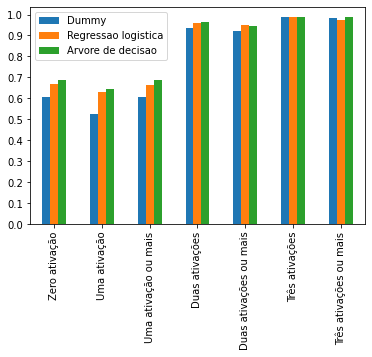

In [ ]:
modelos_machine_learn.plot.bar()
plt.locator_params(axis='y', nbins= 11)

O que pudemos verificar é que os modelos tem baixo indice de previsão para quando não há ativações ou quando há somente uma ativação. Quanto a duas ativações ou mais as previsões passam a ser bastante acertivas. Contudo, fica uma questão, será que a diferença de qualidade dos modelos é por conta que os modelos com nenhuma ou uma única ativação tinham muito mais experimentos?

###Desafio 05: Escolha a droga mais utilizada e tente criar um modelo para prever está label.

As drogas não possuem variação de ativação, então vou fazer verificar outros parametros e ver o quão bem os modelos se sãem.

In [ ]:
dados_comb = pd.get_dummies(dados_combinados, 
                                  columns=['tratamento'], 
                                  drop_first=True)

In [ ]:
x_tratamento = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', 'tratamento_com_droga', 'eh_controle'], axis=1)
x_tratamento = pd.get_dummies(x_tratamento, columns=['dose', 'tempo'])
y_tratamento = dados_comb['tratamento_com_droga']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_tratamento, y_tratamento, test_size = 0.2, stratify=y_tratamento, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
report = classification_report(y_teste, previsao_dummy)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.92      1.00      0.96      4390

    accuracy                           0.92      4763
   macro avg       0.46      0.50      0.48      4763
weighted avg       0.85      0.92      0.88      4763



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
previsao_logistRegre = modelo_rlogistica.predict(x_teste)
report = classification_report(y_teste, previsao_logistRegre)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       373
           1       0.97      0.98      0.97      4390

    accuracy                           0.95      4763
   macro avg       0.84      0.81      0.82      4763
weighted avg       0.95      0.95      0.95      4763



In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
previsao_decisiontree = modelo_arvore.predict(x_teste)
report = classification_report(y_teste, previsao_decisiontree)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.06      0.11       373
           1       0.93      1.00      0.96      4390

    accuracy                           0.92      4763
   macro avg       0.73      0.53      0.53      4763
weighted avg       0.90      0.92      0.89      4763



In [ ]:
dados_comb = pd.get_dummies(dados_combinados, 
                                  columns=['dose'], 
                                  drop_first=True)

In [ ]:
x_dose = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', 'eh_controle', 'dose_D2'], axis=1)
x_dose = pd.get_dummies(x_dose, columns=['tratamento', 'tempo'])
y_dose = dados_comb['dose_D2']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_dose, y_dose, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.5112324165441948

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.9370144866680663

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.7812303170270838

In [ ]:
dados_comb = dados_combinados.copy()

In [ ]:
x_tempo = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '24h', '48h', '72h', 'tempo'], axis=1)
x_tempo = pd.get_dummies(x_tempo, columns=['tratamento', 'dose'])
y_tempo = dados_comb['tempo']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_tempo, y_tempo, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.3321436069703968

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6831828679403738

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.4442578207012387

Como o modelo de regressão logistica tem se mostrado consistentemente melhor e o parâmetro tempo tem 3 variáveis, vou avaliar o parametro tempo somente com ele.

In [ ]:
x_tempo_24 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '24h', '48h', '72h', 'tempo'], axis=1)
x_tempo_24 = pd.get_dummies(x_tempo_24, columns=['tratamento', 'dose'])
y_tempo_24 = dados_comb['24h']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_tempo_24, y_tempo_24, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.8198614318706697

In [ ]:
x_tempo_48 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '24h', '48h', '72h', 'tempo'], axis=1)
x_tempo_48 = pd.get_dummies(x_tempo_48, columns=['tratamento', 'dose'])
y_tempo_48 = dados_comb['48h']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_tempo_48, y_tempo_48, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.720974175939534

In [ ]:
x_tempo_72 = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa', '24h', '48h', '72h', 'tempo'], axis=1)
x_tempo_72 = pd.get_dummies(x_tempo_72, columns=['tratamento', 'dose'])
y_tempo_72 = dados_comb['72h']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_tempo_72, y_tempo_72, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.820911190426202

###Desafio 06: Resumo do que você aprendeu com os dados

Aprendi a usar o modulo train_test_split para dividir os dados a serem utilizados para cada determinado algoritimo.

Aprendi um pouco sobre o algoritimo de regressão logisticas.

Aprendi um pouco sobre o algoritimo de árvore de decisão.

Aprendi um pouco sobre o altoritimo de floresta aleatória.

Aprendi a fazer um gráfico de árvore para demostrar o resultado do algoritimo de árvore de decisão.

Aprendi que overfit é quando um algoritimo fica bom demais no grupo treino e perde desempenho no grupo teste.

Aprendi a usar o .get_dummies para dividir colunas em outras colunas com 0 (falso) e 1 (verdadeiro) para cada opção da coluna original.

